# Run the file containing the functions used in this script
## By default this is a file called "methane_functions.r" in the working directory of this script
## Do NOT change the working directory at any point while using this script.

In [1]:
methaneFunctions<-paste(getwd(),"/methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)){
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of methane_functions.r")
}

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/rriv_methane/methane_functions.r"

# 0. Load packages used

In [2]:
# Package names
packages <- c("dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis", "ggpubr", "tidyverse", "mgcv")
packageHandler(packages)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: viridisLite

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ purrr   0.3.4
✔ tidyr   

In [3]:
# .libPaths()
# class(.libPaths())

In [4]:
# Sys.getenv('R_LIBS_USER')

# 1. Hardcoded definitions that don't require loading anything?

# 2. Definitions that lead to or require processing data

### Location of data

In [5]:
conductivityDataDir<-"~/Desktop/data/Raw_Sensor_Data/WaterBear_TemperatureConductivity"

ch4DataDir<-"~/Desktop/data/Methane Calibration/Methane_Calibration_Anya/20230530"

co2DataDir<-"~/Desktop/data/Methane Calibration/field_test/20230424_deployment"
outputDir<-"~/Desktop/waterbear/thesisFigures"

GHGduty75DataDir<-"~/Desktop/data/powerTesting/ghg_dutycycle75"
GHGduty50DataDir<-"~/Desktop/data/powerTesting/ghg_dutycycle50"
GHGduty25DataDir<-"~/Desktop/data/powerTesting/ghg_dutycycle25"

ch4dissipationDataDir<-"~/Desktop/data/Methane Calibration/20230227_1000ppm-2ppm_dissipation"

anya_pdock2DataDir<-"~/Desktop/data/Methane Calibration/Methane_Calibration_Anya/20230621-pdock"

cNcDataDir<-"~/Desktop/data/caseNoCase"

#### Read in data

In [6]:
# conductivityData<-concat_dirs(directory=conductivityDataDir,readFn = read_rriv_CSV, filePattern="CSV", minFileSize = 500)
# head(conductivityData)
# names(conductivityData)

In [7]:
# saveDFcsv(conductivityData)

conductivityData<-read.csv("~/Desktop/waterbear/thesisFigures/conductivityData.csv",header=TRUE)

In [8]:
ch4Data<-concat_dirs(directory = ch4DataDir,readFn = read_rriv_CSV, filePattern = "CSV", minFileSize = 500)
# head(ch4Data)
# names(ch4Data)
ch4Data<-process_rriv_columns(ch4Data)

UUIDdict=c(
    "57FF6E068387575148360767"="1",
    "57FF6D068387575151290167"="2",
    "57FF6F068387575149330867"="3",
    "57FF6E068387575140070767"="4",
    "50FF74068678545256252467"="5")
UUIDdict

ch4Data<-createSensorColFromIDs(ch4Data,idCol = "uuid",dict = UUIDdict)

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


57FF6E068387575148360767 57FF6D068387575151290167 57FF6F068387575149330867 
                     "1"                      "2"                      "3" 
57FF6E068387575140070767 50FF74068678545256252467 
                     "4"                      "5"

In [9]:
# unique(ch4Data$Sensor)

In [10]:
lgrData<-concat_dirs(directory = ch4DataDir,readFn = read_GA_ZIP, filePattern = ".zip$", minFileSize = 500)
# head(lgrData)
# names(lgrData)

clean_temp()

lgrData$Time<-lubridate::as_datetime(lgrData$Time)

# str(lgrData)

[1] "Dataframe generated, manually process column types if necessary"


In [11]:
co2Data<-concat_dirs(directory = co2DataDir,readFn = read_rriv_CSV, filePattern="CSV", minFileSize = 500)
# head(co2Data)
# names(co2Data)

co2Data<-process_rriv_columns(co2Data)

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


In [12]:
ghg75_data<-concat_dirs(directory=GHGduty75DataDir,readFn = read_rriv_CSV, filePattern="CSV", minFileSize = 500)
ghg50_data<-concat_dirs(directory=GHGduty50DataDir,readFn = read_rriv_CSV, filePattern="CSV", minFileSize = 500)
ghg25_data<-concat_dirs(directory=GHGduty25DataDir,readFn=read_rriv_CSV,filePattern="CSV",minFileSize=500)

ghg75_data<-process_rriv_columns(ghg75_data)
ghg50_data<-process_rriv_columns(ghg50_data)
ghg25_data<-process_rriv_columns(ghg25_data)

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


In [13]:
# str(ghg50_data)

In [14]:
# head(ghg50_data)

In [15]:
ghg75_data$battery.mV<-ghg75_data$battery.V*5000/4096
ghg50_data$battery.mV<-ghg50_data$battery.V*5000/4096
ghg25_data$battery.mV<-ghg25_data$battery.V*5000/4096

In [16]:
# head(ghg50_data)

ghg75_summary<-ghg75_data[ghg75_data$type=="summary",]
ghg75_raw<-ghg75_data[ghg75_data$type=="raw",]

ghg50_summary<-ghg50_data[ghg50_data$type=="summary",]
ghg50_raw<-ghg50_data[ghg50_data$type=="raw",]

ghg25_summary<-ghg25_data[ghg25_data$type=="summary",]
ghg25_raw<-ghg25_data[ghg25_data$type=="raw",]

In [17]:
ch4dissipation_data<-concat_dirs(directory=ch4dissipationDataDir, readFn=read_rriv_CSV,filePattern=".CSV", minFileSize=500)

ch4dissipation_data<-process_rriv_columns(ch4dissipation_data)

Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


In [18]:
pdock2_rriv<-concat_dirs(anya_pdock2DataDir, read_rriv_CSV, ".CSV", 500)
pdock2_rriv<-process_rriv_columns(pdock2_rriv)

pdock2_lgr<-concat_dirs(anya_pdock2DataDir, read_GA_ZIP, ".zip", 300)
clean_temp()

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


Warning message in process_rriv_columns(pdock2_rriv):
“NAs introduced by coercion”


[1] "Dataframe generated, manually process column types if necessary"


In [19]:
cNc_rriv<-concat_dirs(cNcDataDir, read_rriv_CSV, ".CSV", 500)
cNc_rriv<-process_rriv_columns(cNc_rriv)

cNc_lgr<-concat_dirs(cNcDataDir, read_GA_ZIP, ".zip", 300)
clean_temp()

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"
[1] "Dataframe generated, manually process column types if necessary"


# CH4 vs LGR Figures

In [20]:
# CH4 vs lgr
names(ch4Data)
names(lgrData)

range_ch4<-range(ch4Data$time.h)
range_ch4

range_lgr<-range(lgrData$Time)
range_lgr

overlapStart<-max(range_lgr[1], range_ch4[1])
overlapEnd<-min(range_lgr[2], range_ch4[2])

overlapStart
overlapEnd

[1] "type"             "site"             "logger"           "deployment"      
 [5] "deployed_at"      "uuid"             "time.s"           "time.h"          
 [9] "battery.V"        "measurementCycle" "burstCycle"       "aht_C"           
[13] "aht_RH"           "ch4_raw"          "ch4_cal"          "user_note"       
[17] "user_value"       "Sensor"

[1] "Time"               "X.CH4._ppm"         "X.CH4._ppm_sd"     
 [4] "X.CO2._ppm"         "X.CO2._ppm_sd"      "X.H2O._ppm"        
 [7] "X.H2O._ppm_sd"      "X.CH4.d_ppm"        "X.CH4.d_ppm_sd"    
[10] "X.CO2.d_ppm"        "X.CO2.d_ppm_sd"     "GasP_torr"         
[13] "GasP_torr_sd"       "GasT_C"             "GasT_C_sd"         
[16] "AmbT_C"             "AmbT_C_sd"          "RD0_us"            
[19] "RD0_us_sd"          "RD1_us"             "RD1_us_sd"         
[22] "RD0_raw_us"         "LTC0_v"             "LTC0_v_sd"         
[25] "LTC1_v"             "LTC1_v_sd"          "HZ"                
[28] "HZ_sd"              "Batt_v"             "Batt_v_sd"         
[31] "BattPer"            "BattPer_sd"         "Temp_Status_mA"    
[34] "Analyzer_Status_mA" "Fit_Flag"           "MIU_VALVE"         
[37] "MIU_DESC"

[1] "2023-05-30 14:51:02 UTC" "2023-05-30 17:20:25 UTC"

[1] "2023-05-30 15:02:26 UTC" "2023-05-30 17:09:20 UTC"

[1] "2023-05-30 15:02:26 UTC"

[1] "2023-05-30 17:09:20 UTC"

In [21]:
# initial subset of ch4 and lgr data
ol_ch4<-ch4Data[ch4Data$time.h>overlapStart & ch4Data$time.h<overlapEnd,]
ol_lgr<-lgrData[lgrData$Time>overlapStart & lgrData$Time<overlapEnd,]

range(ol_ch4$time.h)
range(ol_lgr$Time)

[1] "2023-05-30 15:02:26 UTC" "2023-05-30 17:09:19 UTC"

[1] "2023-05-30 15:04:07 UTC" "2023-05-30 17:07:39 UTC"

In [22]:
ol_ch4_summary<-ol_ch4[ol_ch4$type=="summary",]
head(ol_ch4_summary)

type    site   logger deployment                                        
132 summary PDock1 CAL1   PWAdock-cal1.1-57FF6E068387575148360767-1685455590
143 summary PDock1 CAL1   PWAdock-cal1.1-57FF6E068387575148360767-1685455590
154 summary PDock1 CAL1   PWAdock-cal1.1-57FF6E068387575148360767-1685455590
165 summary PDock1 CAL1   PWAdock-cal1.1-57FF6E068387575148360767-1685455590
176 summary PDock1 CAL1   PWAdock-cal1.1-57FF6E068387575148360767-1685455590
187 summary PDock1 CAL1   PWAdock-cal1.1-57FF6E068387575148360767-1685455590
    deployed_at uuid                     time.s     time.h             
132 1685455590  57FF6E068387575148360767 1685459006 2023-05-30 15:03:25
143 1685455590  57FF6E068387575148360767 1685459066 2023-05-30 15:04:25
154 1685455590  57FF6E068387575148360767 1685459126 2023-05-30 15:05:25
165 1685455590  57FF6E068387575148360767 1685459186 2023-05-30 15:06:25
176 1685455590  57FF6E068387575148360767 1685459246 2023-05-30 15:07:25
187 1685455590  57FF6E068387575148360767 1685459306 2023-05-30 15:08:25
    battery.V measurementCycle burstCycle aht_C  aht_RH ch4_raw ch4_cal
132 1159      35849            12         37.288 46.330 680.5   0      
143 1155      35849            13         37.427 46.559 666.9   0      
154 1154      35849            14         37.559 46.719 655.1   0      
165 1153      35849            15         37.643 46.796 644.7   0      
176 1205      35849            16         37.718 46.902 808.3   0      
187 1199      35849            17         37.787 46.996 794.5   0      
    user_note user_value Sensor
132 NA        NA         1     
143 NA        NA         1     
154 NA        NA         1     
165 NA        NA         1     
176 NA        NA         1     
187 NA        NA         1

# interpolate summary ch4 lines and lgr data

In [23]:
# Manually create dictionary for column names, and what to rename them to in output df
interpolateDict<-c(
        "ch4_raw"="ch4_raw_rriv",
        "aht_C"="aht_C",
        "aht_RH"="aht_RH",
        "dht_C"="dht_C",
        "dht_RH"="dht_RH",
        "X.CH4._ppm"="ch4_ppm_lgr")

In [24]:
interpolateData<-function(df1=ol_ch4_summary, df1TimeCol="time.h",
                          df2=ol_lgr, df2TimeCol="Time",
                          iDict=interpolateDict){
    iD<-iDict
    iKeys<-names(iD)
    
    # extract time range for first data frame
    df1r<-range(df1[[ df1TimeCol ]])

    # extract time range for second data frame
    df2r<-range(df2[[ df2TimeCol ]])

    # create output dataframe using whichever time range is larger
    # use sequence to create minute intervals across the range for data points in a new dataframe
    if(df1r[2]-df1r[1] > df2r[2]-df2r[1]){
        print("df1 time range is larger")
        outputDF<-data.frame(time_utc=seq(df1r[1],df1r[2], by="min"))
    } else{
        print("df2 time range is larger")
        outputDF<-data.frame(time_utc=seq(df2r[1],df2r[2], by="min"))
    }
    
    # extract column names from dataframe 1
    cols<-names(df1)

    # only interpolate data that is both in the dictionary and in the column names
    for(key in iKeys[iKeys %in% cols]){
        outputDF[[ iD[[key]] ]]<-approx(df1[[df1TimeCol]], df1[[key]], outputDF[["time_utc"]])$y
    }

    # extract column names from dataframe 2
    cols<-names(df2)

    # only interpolate data that is both in the dictionary and in the column names
    for(key in iKeys[iKeys %in% cols]){
        outputDF[[ iD[[key]] ]]<-approx(df2[[df2TimeCol]], df2[[key]], outputDF[["time_utc"]])$y
    }

    # remove lines with NA
    outputDF<-outputDF[complete.cases(outputDF),]
    
    return(outputDF)
}

In [25]:
# interpolate data for each uuid then merge via rbind()
interpolated_data<-data.frame()

sensorList<-unique(ol_ch4_summary$Sensor)

for(sensor in sensorList){
    subset<-ol_ch4_summary[ol_ch4_summary$Sensor==sensor,]
    temp<-interpolateData(df1=subset)
    temp$Sensor=sensor
    interpolated_data<-rbind(interpolated_data, temp)
}
unique(interpolated_data$Sensor)

[1] "df1 time range is larger"
[1] "df1 time range is larger"
[1] "df1 time range is larger"
[1] "df1 time range is larger"
[1] "df1 time range is larger"


[1] "1" "2" "3" "4" "5"

In [26]:
# custom color blind color palettes:
# https://davidmathlogic.com/colorblind/#%237000CC-%23E22C7B-%23FFAF2A-%2300CACA-%23046CC5-%23CB60E6-%23349634-%23E47D00
custom_colors=c('#7000CC','#E22C7B','#FFAF2A','#00CACA','#046CC5','#CB60E6','#349634','#E47D00') #00AAAA

In [27]:
# +
#         geom_point(size=2)+geom_line(size=1)+theme_classic(base_size=18)+
#         labs(x="Time (hr:min)", y=ylabs[i], color="Logger")+
#         scale_color_manual(values=custom_colors,na.translate=F)+
#         scale_x_datetime(date_labels="%H:%M",breaks=scales::pretty_breaks(n=4),expand=c(0,60*1.5))

In [28]:
names(interpolated_data)
interpolated_data$ch4_raw_rriv_mV<-interpolated_data$ch4_raw_rriv*5000/4096

head(interpolated_data$ch4_raw_rriv_mV)

[1] "time_utc"     "ch4_raw_rriv" "aht_C"        "aht_RH"       "ch4_ppm_lgr" 
[6] "Sensor"

[1] 814.1013 799.7124 787.0247 985.8798 969.9311 946.8429

In [29]:
range(interpolated_data$time_utc)

[1] "2023-05-30 15:04:25 UTC" "2023-05-30 17:07:26 UTC"

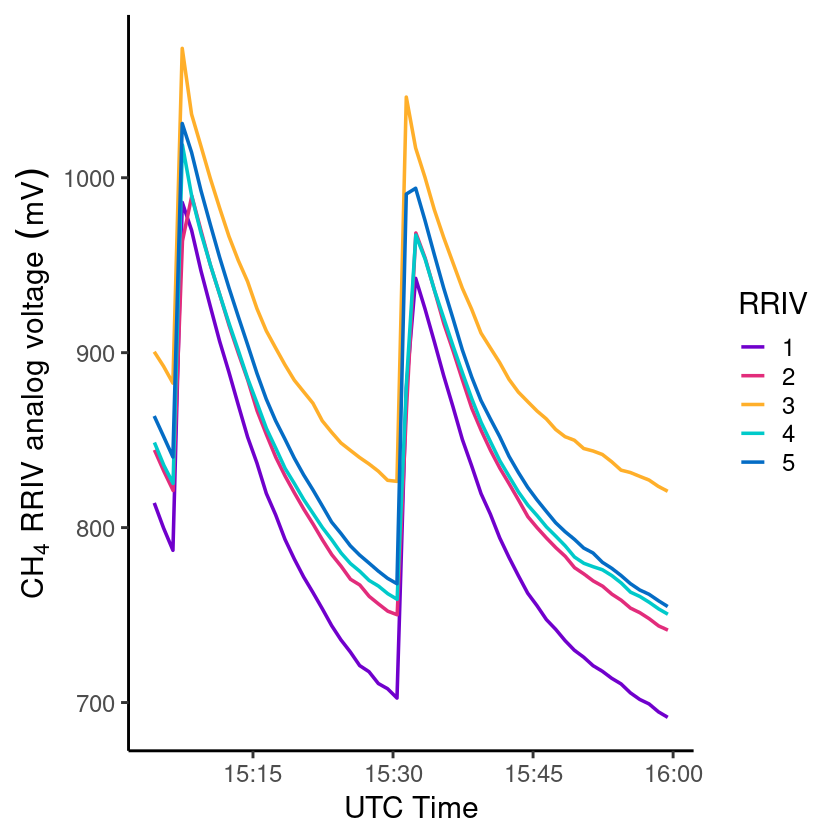

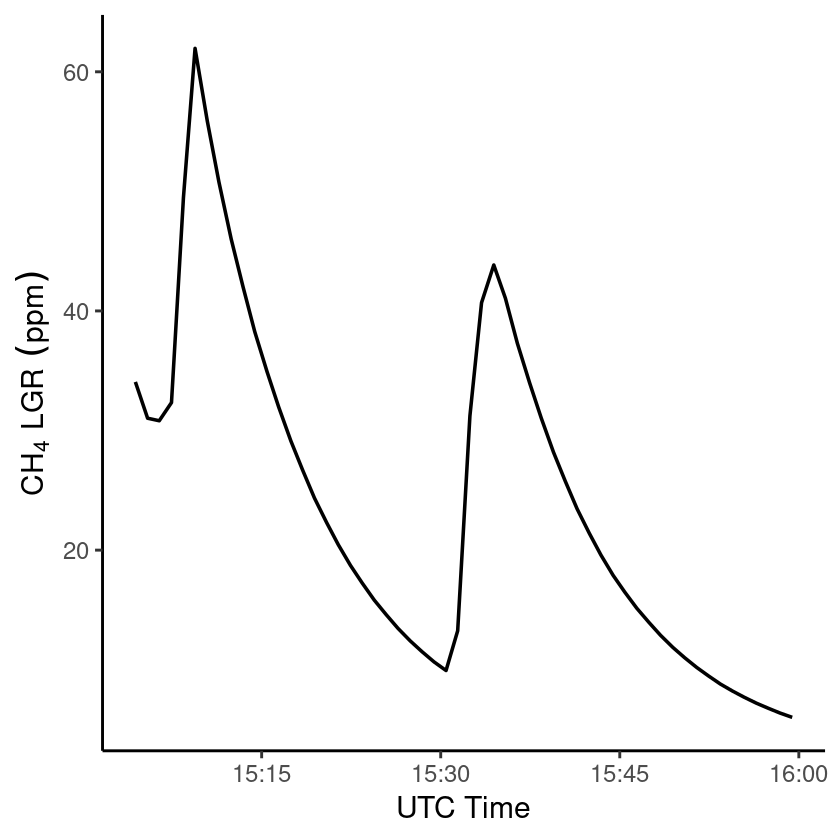

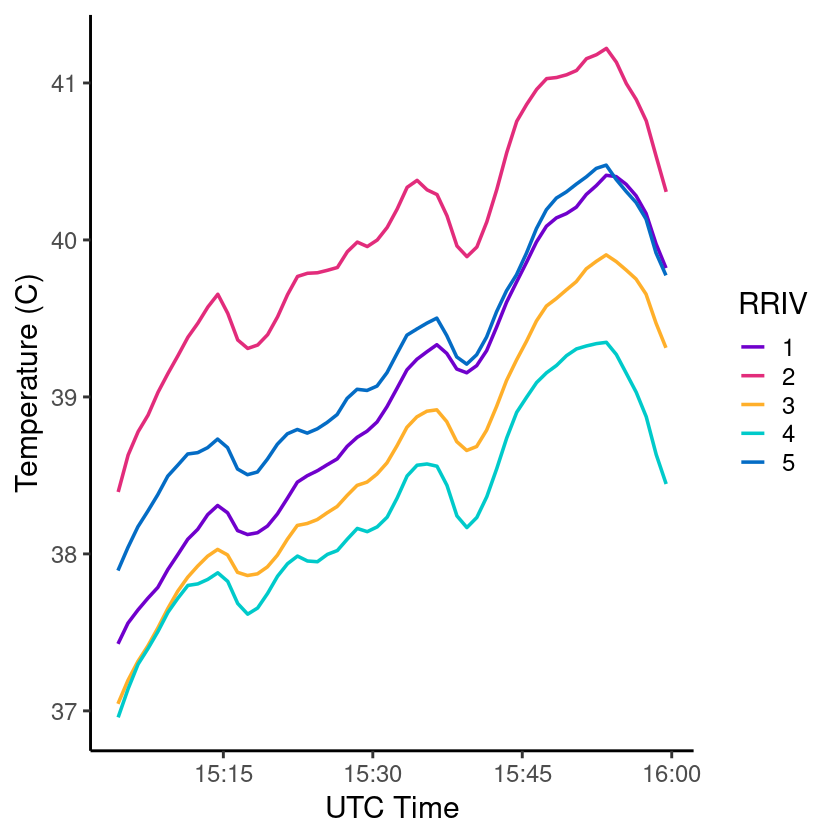

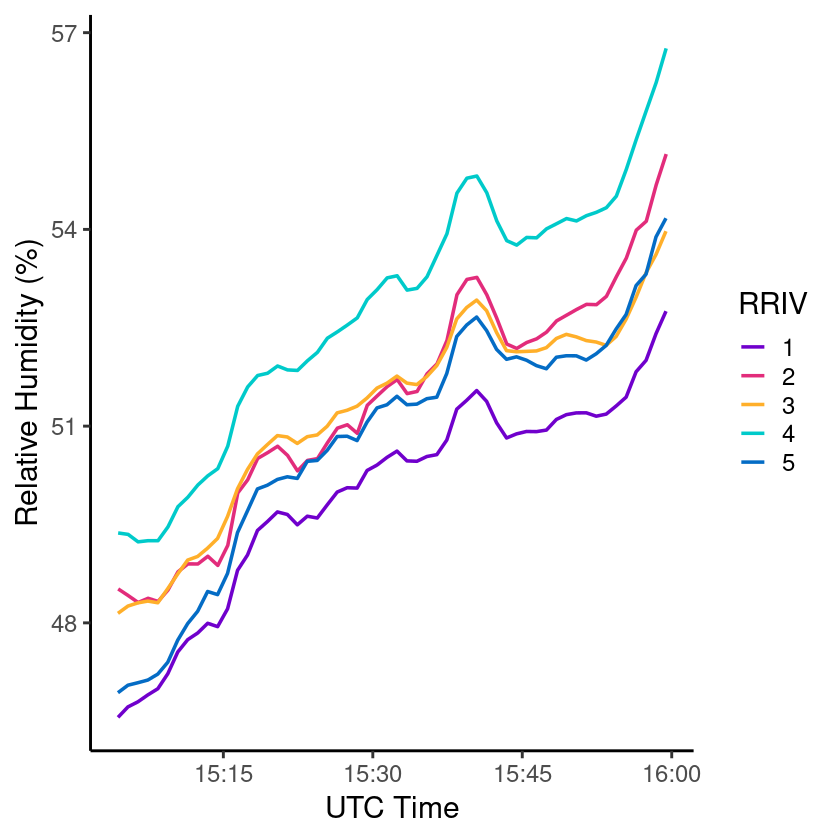

In [30]:
timeStart<-lubridate::as_datetime("2023-05-30 15:00:00 UTC")
timeEnd<-lubridate::as_datetime("2023-05-30 16:00:00 UTC")

subset<-interpolated_data[interpolated_data$time_utc>timeStart & interpolated_data$time_utc<timeEnd,]

A<-ggplot(subset, aes(x=time_utc, y=ch4_raw_rriv_mV, color=Sensor))+geom_line(size=1)+
    theme_classic(base_size=18)+
    labs(x="UTC Time",y=CH[4]~RRIV~analog~voltage~(mV))+
    scale_color_manual(values=custom_colors, name ="RRIV")
A

B<-ggplot(subset, aes(x=time_utc, y=ch4_ppm_lgr))+geom_line(size=1)+
    theme_classic(base_size=18)+
    labs(x="UTC Time",y=CH[4]~LGR~(ppm))
B

C<-ggplot(subset, aes(x=time_utc, y=aht_C, color=Sensor))+geom_line(size=1)+
    theme_classic(base_size=18)+
    labs(x="UTC Time",y="Temperature (C)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
C

D<-ggplot(subset, aes(x=time_utc, y=aht_RH, color=Sensor))+geom_line(size=1)+
    theme_classic(base_size=18)+
    labs(x="UTC Time",y="Relative Humidity (%)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
D

In [31]:
# ggplot(subset, aes(x=time_utc, y=ch4_raw_rriv, color=Sensor))+geom_line(size=1)+
# theme_classic(base_size=18)+
# labs(x="UTC Time",y="CH4 RRIV digital reading")+
# scale_color_manual(values=custom_colors, name="RRIV")

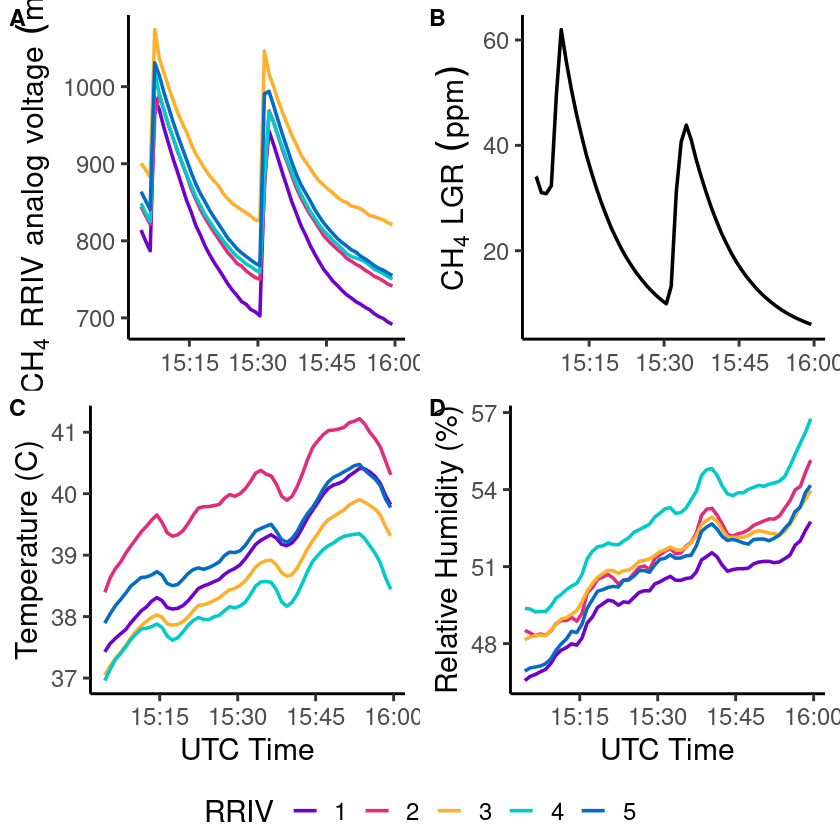

In [32]:
methaneConfiguration<-ggarrange(A+rremove("x.title"),
          B+rremove("x.title"), C, D,
          labels=c("A","B","C","D"),
          common.legend=TRUE,
          legend="bottom"
         )
methaneConfiguration

In [33]:
savePlot(plot = methaneConfiguration,tag = "methaneConfiguration4")

png 
  2

# CO2 data

In [34]:
head(co2Data)

type site  logger deployment                                        
1 raw  PWAD2 21011  fieldCal_CH002-57FF6C068387575136470767-1682374856
2 raw  PWAD2 21011  fieldCal_CH002-57FF6C068387575136470767-1682374856
3 raw  PWAD2 21011  fieldCal_CH002-57FF6C068387575136470767-1682374856
4 raw  PWAD2 21011  fieldCal_CH002-57FF6C068387575136470767-1682374856
5 raw  PWAD2 21011  fieldCal_CH002-57FF6C068387575136470767-1682374856
6 raw  PWAD2 21011  fieldCal_CH002-57FF6C068387575136470767-1682374856
  deployed_at uuid                     time.s     time.h              battery.V
1 1682374856  57FF6C068387575136470767 1682374938 2023-04-24 22:22:17 1320     
2 1682374856  57FF6C068387575136470767 1682374940 2023-04-24 22:22:20 1237     
3 1682374856  57FF6C068387575136470767 1682374943 2023-04-24 22:22:22 1222     
4 1682374856  57FF6C068387575136470767 1682374945 2023-04-24 22:22:25 1223     
5 1682374856  57FF6C068387575136470767 1682374948 2023-04-24 22:22:27 1221     
6 1682374856  57FF6C068387575136470767 1682374950 2023-04-24 22:22:30 1220     
  measurementCycle burstCycle dht_C dht_RH atlas_CO2_ppm ch4rf_raw ch4rf_cal
1 1                1          18.9  29.0   1595          1926      0        
2 1                1          18.9  29.0   1593          1929      0        
3 1                1          19.0  31.0   1592          1926      0        
4 1                1          19.0  31.0   1590          1927      0        
5 1                1          19.0  31.1   1589          1925      0        
6 1                1          19.0  31.1   1587          1926      0        
  ch4_raw ch4_cal user_note user_value
1 1127    0       NA        NA        
2 1124    0       NA        NA        
3 1123    0       NA        NA        
4 1123    0       NA        NA        
5 1125    0       NA        NA        
6 1123    0       NA        NA

In [35]:
rawco2<-co2Data[co2Data$type=="raw",]
summaryco2<-co2Data[co2Data$type=="summary",]

In [36]:
summaryco2$ch4_raw_mV<-summaryco2$ch4_raw*5000/4096
head(summaryco2)

type    site  logger deployment                                        
700 summary PWAD3 21005  fieldCal_CH004-57FF6A068387575136311367-1682375265
711 summary PWAD3 21005  fieldCal_CH004-57FF6A068387575136311367-1682375265
722 summary PWAD3 21005  fieldCal_CH004-57FF6A068387575136311367-1682375265
733 summary PWAD3 21005  fieldCal_CH004-57FF6A068387575136311367-1682375265
744 summary PWAD3 21005  fieldCal_CH004-57FF6A068387575136311367-1682375265
755 summary PWAD3 21005  fieldCal_CH004-57FF6A068387575136311367-1682375265
    deployed_at uuid                     time.s     time.h             
700 1682375265  57FF6A068387575136311367 1682375377 2023-04-24 22:29:37
711 1682375265  57FF6A068387575136311367 1682375437 2023-04-24 22:30:37
722 1682375265  57FF6A068387575136311367 1682375497 2023-04-24 22:31:37
733 1682375265  57FF6A068387575136311367 1682375557 2023-04-24 22:32:37
744 1682375265  57FF6A068387575136311367 1682375618 2023-04-24 22:33:37
755 1682375265  57FF6A068387575136311367 1682375678 2023-04-24 22:34:37
    battery.V measurementCycle ⋯ dht_C dht_RH atlas_CO2_ppm ch4rf_raw ch4rf_cal
700 1651      2                ⋯ 18.06 29.02  1068.7        2004.7    0        
711 1655      2                ⋯ 18.18 29.28  1027.2        2014.6    0        
722 1648      2                ⋯ 18.28 29.00  1013.7        2022.2    0        
733 1651      2                ⋯ 18.42 28.64   996.4        2028.4    0        
744 1645      2                ⋯ 18.58 28.20   985.2        2030.4    0        
755 1652      2                ⋯ 18.76 27.76   976.7        2032.0    0        
    ch4_raw ch4_cal user_note user_value ch4_raw_mV
700 351.6   0       NA        NA         429.1992  
711 402.5   0       NA        NA         491.3330  
722 436.7   0       NA        NA         533.0811  
733 459.4   0       NA        NA         560.7910  
744 469.3   0       NA        NA         572.8760  
755 480.8   0       NA        NA         586.9141

In [37]:
subsetco2<-summaryco2[summaryco2$logger != "21005",]
unique(subsetco2$uuid)
UUIDdict=c(
    "57FF6E068387575145101167"="1",
    "57FF74068387575109431367"="2"
    )
UUIDdict

subsetco2<-createSensorColFromIDs(subsetco2,idCol = "uuid",dict = UUIDdict)

range(subsetco2$time.h)

[1] 57FF6E068387575145101167 57FF74068387575109431367
4 Levels: 57FF6A068387575136311367 ... 57FF74068387575109431367

57FF6E068387575145101167 57FF74068387575109431367 
                     "1"                      "2"

[1] "2023-04-24 22:35:37 UTC" "2023-04-28 05:39:40 UTC"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



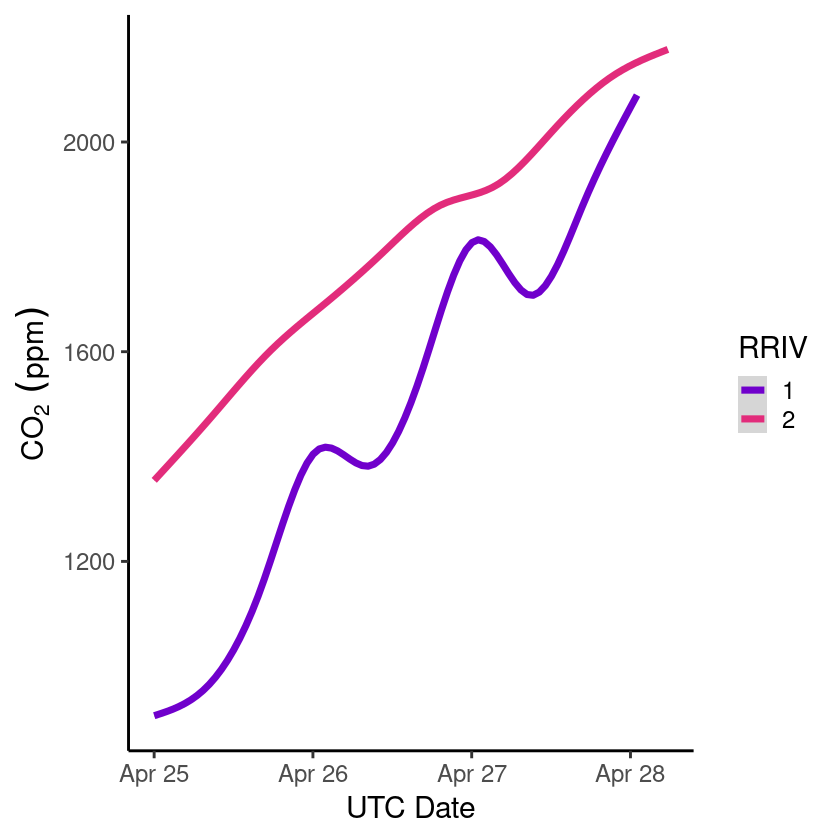

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



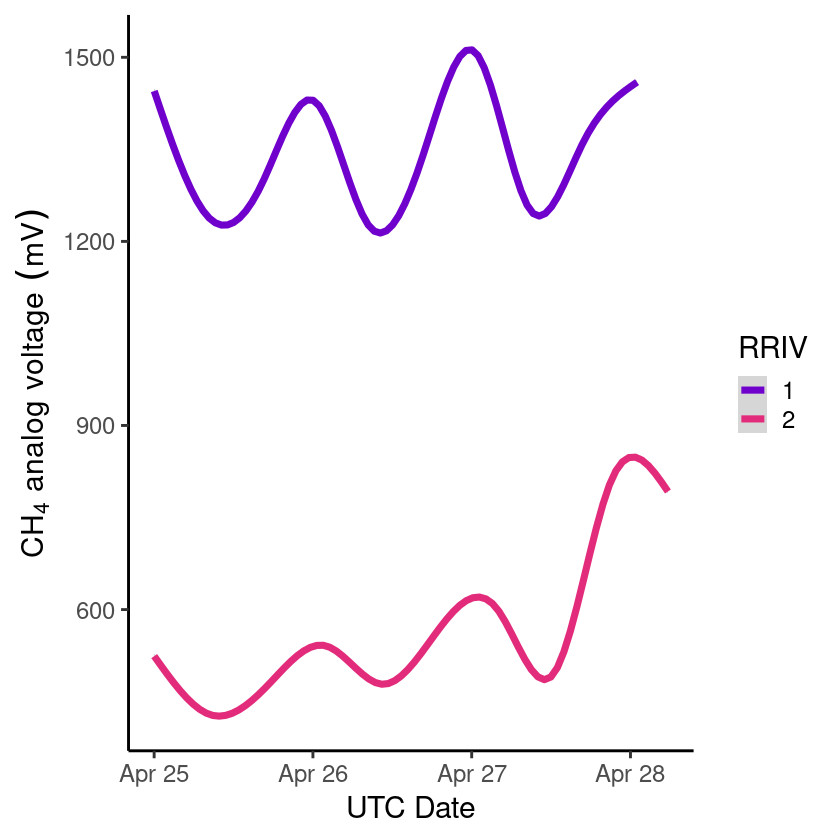

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



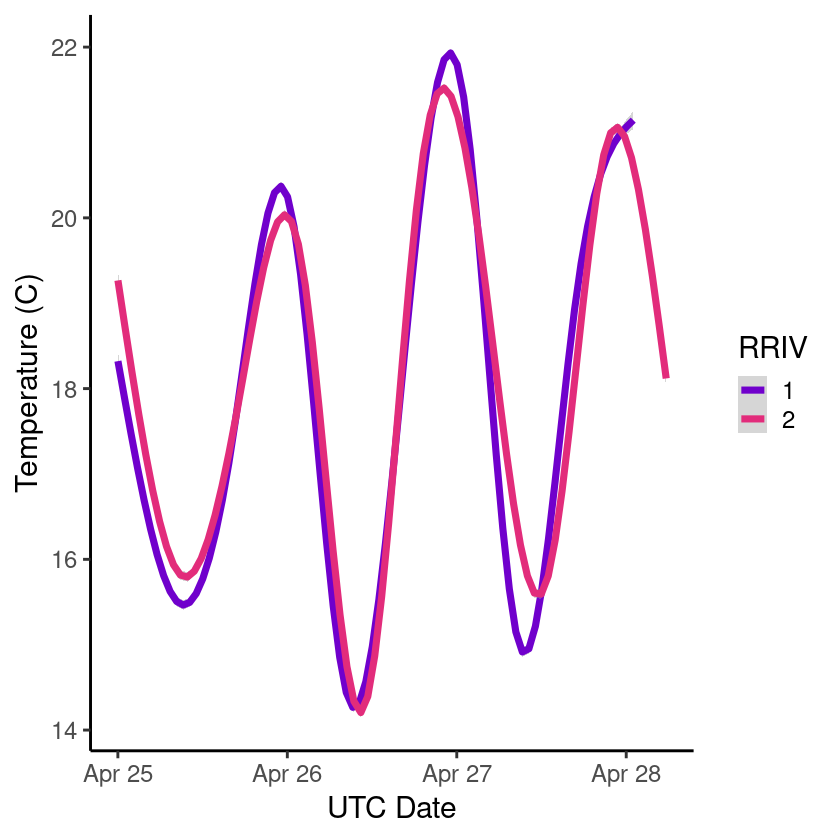

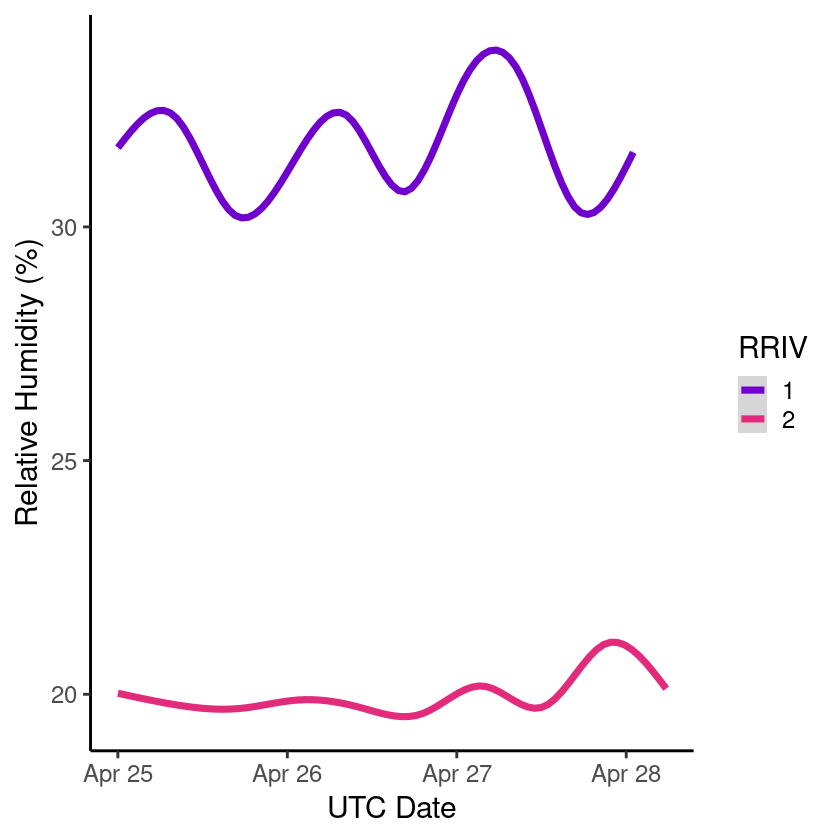

In [38]:
timeStart<-lubridate::as_datetime("2023-04-25 00:00:00 UTC")
timeEnd<-lubridate::as_datetime("2023-04-29 00:00:00 UTC")

subsetco2_time<-subsetco2[subsetco2$time.h>timeStart & subsetco2$time.h<timeEnd,]

a<-ggplot(data=subsetco2_time, aes(x=time.h, y=atlas_CO2_ppm, color=Sensor))+geom_smooth(size=2)+
    theme_classic(base_size=18)+
    labs(x="UTC Date",y=CO[2]~(ppm))+
    scale_color_manual(values=custom_colors, name ="RRIV")
a

b<-ggplot(data=subsetco2_time, aes(x=time.h, y=ch4_raw_mV, color=Sensor))+geom_smooth(size=2)+
    theme_classic(base_size=18)+
    labs(x="UTC Date",y=CH[4]~analog~voltage~(mV))+
    scale_color_manual(values=custom_colors, name ="RRIV")
b

c<-ggplot(data=subsetco2_time, aes(x=time.h, y=dht_C, color=Sensor))+geom_smooth(size=2)+
    theme_classic(base_size=18)+
    labs(x="UTC Date",y="Temperature (C)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
c

d<-ggplot(data=subsetco2_time, aes(x=time.h, y=dht_RH, color=Sensor))+geom_smooth(size=2)+
    theme_classic(base_size=18)+
    labs(x="UTC Date",y="Relative Humidity (%)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
d

In [39]:
# b<-ggplot(data=subsetco2_time, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+
#     theme_classic(base_size=18)+
#     labs(x="UTC Date",y="CH4 digital reading")+
#     scale_color_manual(values=custom_colors, name ="RRIV")
# b

In [40]:
# c<-ggplot(data=subsetco2_time, aes(x=time.h, y=dht_C, color=Sensor))+geom_point()+
#     theme_classic(base_size=18)+
#     labs(x="UTC Date",y="Temperature (C)")+
#     scale_color_manual(values=custom_colors, name ="RRIV")
# c

# d<-ggplot(data=subsetco2_time, aes(x=time.h, y=dht_RH, color=Sensor))+geom_point()+
#     theme_classic(base_size=18)+
#     labs(x="UTC Date",y="Relative Humidity (%)")+
#     scale_color_manual(values=custom_colors, name ="RRIV")
# d

In [41]:
# ch4co2Configuration<-ggarrange(a,b,
#           labels=c("A","B"),
#           common.legend=TRUE,
#           legend="bottom")
# ch4co2Configuration

# savePlot(plot = ch4co2Configuration,tag = "ch4co2Configuration", width = 1000, height= 600)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



png 
  2

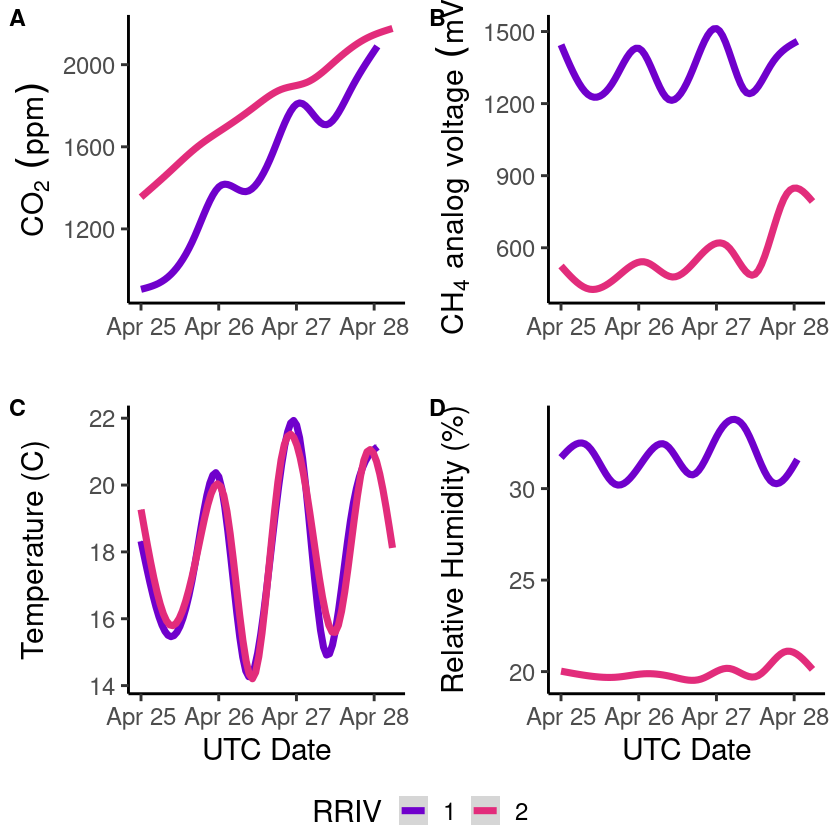

In [42]:
ch4co2Configuration2<-ggarrange(a+rremove("x.title"),b+rremove("x.title"),c,d,
          labels=c("A","B","C","D"),
          common.legend=TRUE,
          legend="bottom", align=c("hv"))
ch4co2Configuration2

savePlot(plot = ch4co2Configuration2,tag = "ch4co2Configuration5")

In [43]:
??ggarrange2

# conductivity data

In [44]:
head(conductivityData)

names(conductivityData)

unique(conductivityData$uuid)

X duuid                    uuid                     time.s       
1 1 #K209_vThermistorProfile 30FF67064E54343838581043 162873909.000
2 2 #K209_vThermistorProfile 30FF67064E54343838581043 162873909.419
3 3 #K209_vThermistorProfile 30FF67064E54343838581043 162873909.857
4 4 #K209_vThermistorProfile 30FF67064E54343838581043 162873910.361
5 5 #K209_vThermistorProfile 30FF67064E54343838581043 162873910.799
6 6 #K209_vThermistorProfile 30FF67064E54343838581043 162873911.237
  time.h                  battery.V temperature.V data3 data4 data5 ⋯
1 1975-03-01 02:45:09.0   301       1727          2736  2285  1871  ⋯
2 1975-03-01 02:45:09.419 520       1726          2650  2260  1894  ⋯
3 1975-03-01 02:45:09.857 515       1726          2597  2245  1909  ⋯
4 1975-03-01 02:45:11.361 517       1727          2561  2239  1922  ⋯
5 1975-03-01 02:45:11.799 512       1726          2531  2226  1924  ⋯
6 1975-03-01 02:45:13.237 512       1727          2499  2215  1926  ⋯
  temperature.C Burst UserValue UserNote A2.PB1.V A3.PC0.V A4.PC1.V A5.PC2.V
1 -1            0     0         0        NA       NA       NA       NA      
2 -1            1     0         0        NA       NA       NA       NA      
3 -1            2     0         0        NA       NA       NA       NA      
4 -1            3     0         0        NA       NA       NA       NA      
5 -1            4     0         0        NA       NA       NA       NA      
6 -1            5     0         0        NA       NA       NA       NA      
  A6.PC3.V ...23
1 NA       NA   
2 NA       NA   
3 NA       NA   
4 NA       NA   
5 NA       NA   
6 NA       NA

[1] "X"               "duuid"           "uuid"            "time.s"         
 [5] "time.h"          "battery.V"       "temperature.V"   "data3"          
 [9] "data4"           "data5"           "data6"           "conductivity.mS"
[13] "time.TC"         "C1"              "V1"              "C2"             
[17] "V2"              "M"               "B"               "temperature.C"  
[21] "Burst"           "UserValue"       "UserNote"        "A2.PB1.V"       
[25] "A3.PC0.V"        "A4.PC1.V"        "A5.PC2.V"        "A6.PC3.V"       
[29] "...23"

[1] "30FF67064E54343838581043"            
 [2] "32FF68064D4D323842451843"            
 [3] NA                                    
 [4] "32FF69064D4D323812391643"            
 [5] ">WT_VALUES: _K213_AMAZON_NO_METHANE_"
 [6] "32FF6E064D4D323841301743"            
 [7] "32FF6F064D4D323810381643"            
 [8] "48FF6B067865495618440867"            
 [9] "32FF67064D4D323846151743"            
[10] "33FF6A065053363628370743"

In [45]:
unique(conductivityData$duuid)
conductivityData<-conductivityData[!is.na(conductivityData$duuid) & conductivityData$duuid != "debug",]
unique(conductivityData$duuid)

[1] "#K209_vThermistorProfile" "#K210_vThermistorProfile"
 [3] NA                         "_K213_AMAZON_NO_METHANE_"
 [5] "ebug"                     "_K214_AMAZON_NO_METHANE_"
 [7] "#K211_vThermistorProfile" "#K215_vThermistorProfile"
 [9] "_K218_AMAZON_NO_METHANE_" "_K219_AMAZON_NO_METHANE_"

[1] "#K209_vThermistorProfile" "#K210_vThermistorProfile"
[3] "_K213_AMAZON_NO_METHANE_" "ebug"                    
[5] "_K214_AMAZON_NO_METHANE_" "#K211_vThermistorProfile"
[7] "#K215_vThermistorProfile" "_K218_AMAZON_NO_METHANE_"
[9] "_K219_AMAZON_NO_METHANE_"

In [46]:
names(conductivityData)
# head(conductivityData)
# str(conductivityData)

conductivityData$time.h<-lubridate::as_datetime(conductivityData$time.h)
conductivityData$time.s<-as.numeric(conductivityData$time.s)
conductivityData$conductivity.mS<-as.numeric(conductivityData$conductivity.mS)

range(conductivityData$time.s)

subset_time<-conductivityData[conductivityData$time.s>1620000000,]

[1] "X"               "duuid"           "uuid"            "time.s"         
 [5] "time.h"          "battery.V"       "temperature.V"   "data3"          
 [9] "data4"           "data5"           "data6"           "conductivity.mS"
[13] "time.TC"         "C1"              "V1"              "C2"             
[17] "V2"              "M"               "B"               "temperature.C"  
[21] "Burst"           "UserValue"       "UserNote"        "A2.PB1.V"       
[25] "A3.PC0.V"        "A4.PC1.V"        "A5.PC2.V"        "A6.PC3.V"       
[29] "...23"

Warning message:
“ 914 failed to parse.”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] NA NA

Warning message:
“Removed 668 rows containing missing values (geom_point).”


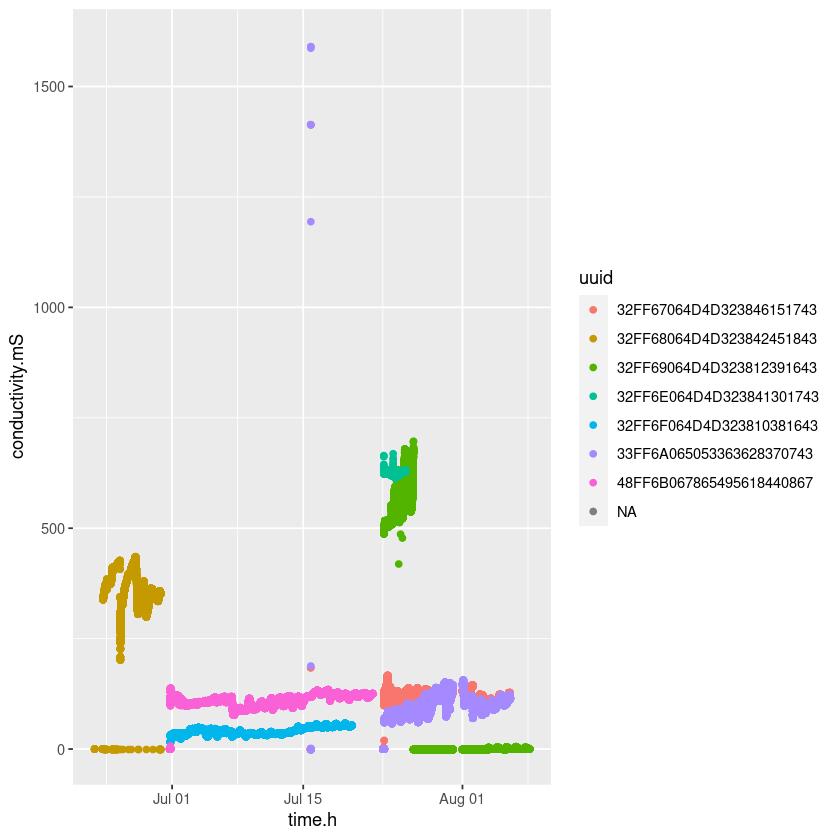

In [47]:
ggplot(data=subset_time, aes(x=time.h, y=conductivity.mS, color=uuid))+geom_point()

Warning message:
“Removed 658 rows containing missing values (geom_point).”


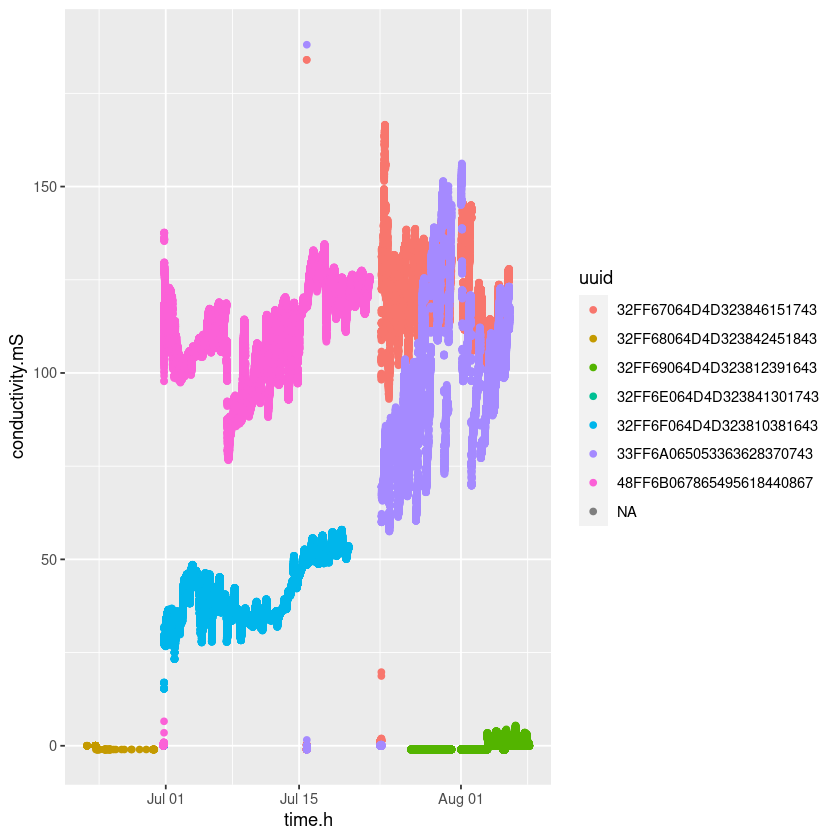

In [48]:
subset_values<-subset_time[subset_time$conductivity.mS<200,]
ggplot(data=subset_values, aes(x=time.h, y=conductivity.mS, color=uuid))+geom_point()

# battery tests, ghg setup 75% and 50% duty cycle
    ghg75_summary
    ghg75_raw
    ghg50_summary
    ghg50_raw
    ghg25_summary
    ghg25_raw

In [49]:
# ghg75_summary
# ghg75_raw
# ghg50_summary
# ghg50_raw
# names(ghg50_raw)
# unique(ghg50_raw$uuid)

# calculate time since deployment
ghg75_summary$timeDiff<-(ghg75_summary$time.s-ghg75_summary$deployed_at)/60/60 # convert seconds to hours
ghg50_summary$timeDiff<-(ghg50_summary$time.s-ghg50_summary$deployed_at)/60/60 # convert seconds to hours
ghg25_summary$timeDiff<-(ghg25_summary$time.s-ghg25_summary$deployed_at)/60/60 # convert seconds to hours

# add duty cycle column
ghg75_summary$dutyCycle<-"75%"
ghg50_summary$dutyCycle<-"50%"
ghg25_summary$dutyCycle<-"25%"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


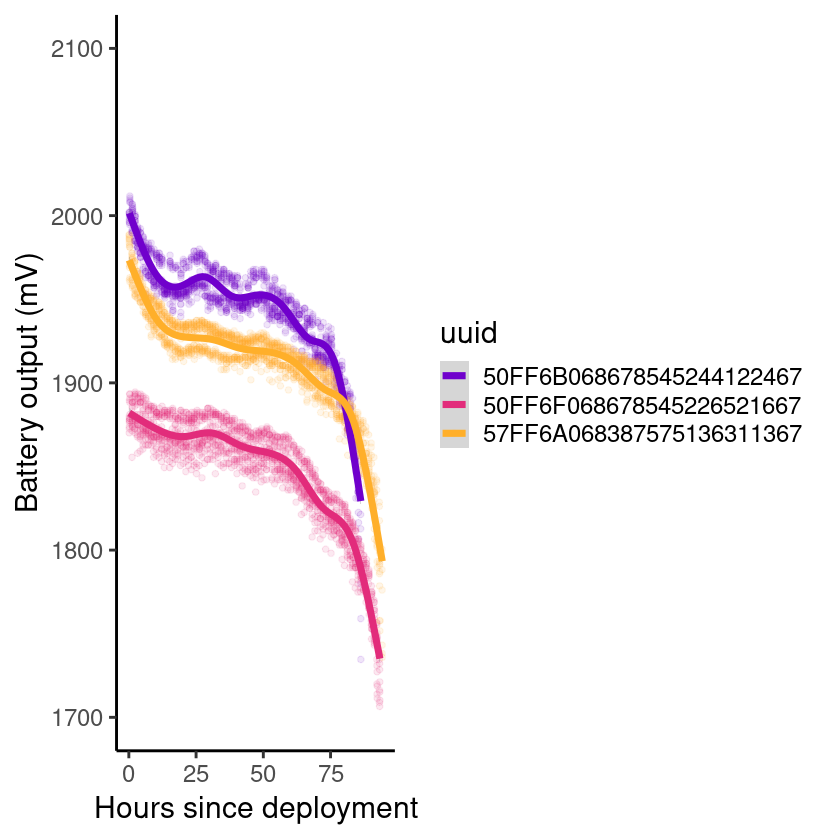

In [50]:
ggplot(ghg25_summary, aes(x=timeDiff,y=battery.mV,color=uuid))+
    theme_classic(base_size=18)+
    scale_y_continuous(limits = c(1700,2100))+
    labs(x="Hours since deployment",y="Battery output (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 50 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 50 rows containing missing values (geom_point).”


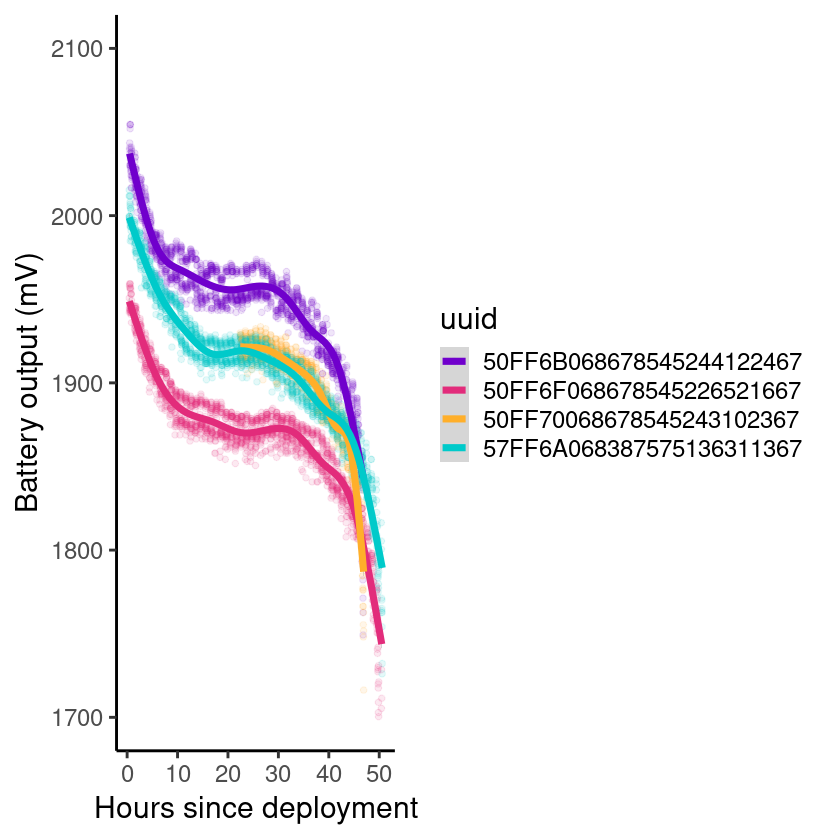

In [51]:
ggplot(ghg50_summary, aes(x=timeDiff,y=battery.mV,color=uuid))+
    theme_classic(base_size=18)+
    scale_y_continuous(limits = c(1700,2100))+
    labs(x="Hours since deployment",y="Battery output (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



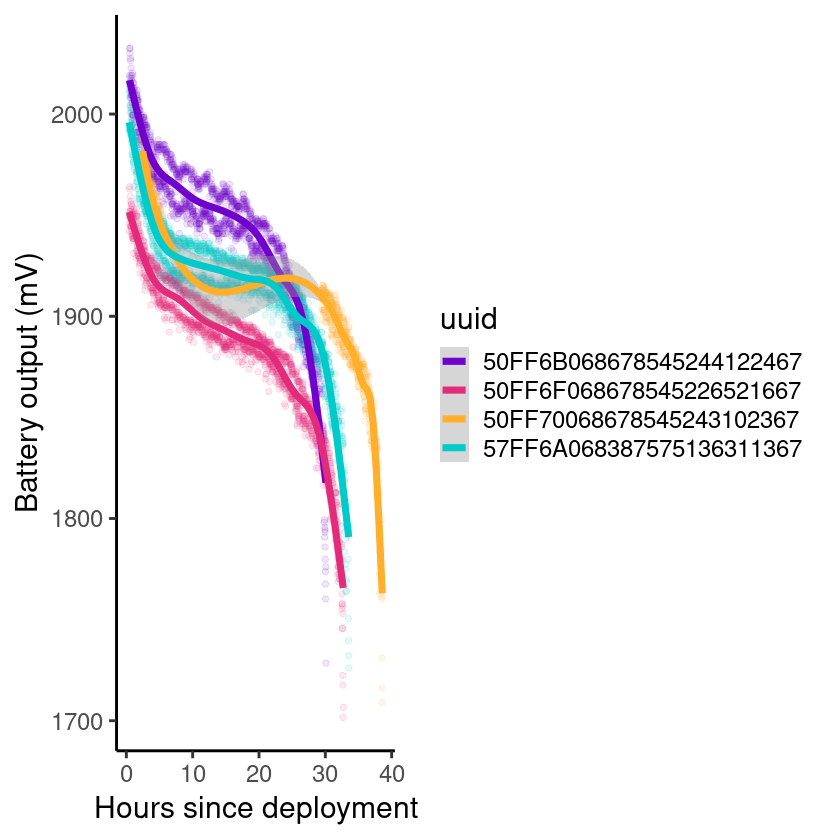

In [52]:
ggplot(ghg75_summary, aes(x=timeDiff,y=battery.mV,color=uuid))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery output (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)

In [53]:
# remove #2, incomplete data, was not working properly on bench due to loose wire on verter
ghg75_summary_3<-ghg75_summary[ghg75_summary$uuid != "50FF70068678545243102367",]
ghg50_summary_3<-ghg50_summary[ghg50_summary$uuid != "50FF70068678545243102367",]
ghg25_summary_3<-ghg25_summary # didn't include the other sensor

# create RRIV column based on uuid
UUIDdict=c(
    "50FF6B068678545244122467"="1",
    "50FF6F068678545226521667"="2",
    "57FF6A068387575136311367"="3"
    )
UUIDdict

ghg75_summary_3<-createNewColFromIDs(ghg75_summary_3,idCol="uuid",newCol="RRIV",dict = UUIDdict)
ghg50_summary_3<-createNewColFromIDs(ghg50_summary_3,idCol="uuid",newCol="RRIV",dict = UUIDdict)
ghg25_summary_3<-createNewColFromIDs(ghg25_summary_3,idCol="uuid",newCol="RRIV",dict = UUIDdict)

50FF6B068678545244122467 50FF6F068678545226521667 57FF6A068387575136311367 
                     "1"                      "2"                      "3"

In [54]:
# calculate duration of deployment for each rriv [estimate is 33.6hrs]
for(rriv in unique(ghg75_summary_3$RRIV)){
    subset<-ghg75_summary_3[ghg75_summary_3$RRIV==rriv,]
    trange<-range(subset$timeDiff)
    print(trange[2]-trange[1])
}

[1] 29.60795
[1] 32.25284
[1] 33.10049


In [55]:
# calculate duration of deployment for each rriv [estimate is 50.4hrs]
for(rriv in unique(ghg50_summary_3$RRIV)){
    subset<-ghg50_summary_3[ghg50_summary_3$RRIV==rriv,]
    trange<-range(subset$timeDiff)
    print(trange[2]-trange[1])
}

[1] 46.32052
[1] 50.08403
[1] 50.18502


In [56]:
# calculate duration of deployment for each rriv [estimate is 98.4hrs]
for(rriv in unique(ghg25_summary_3$RRIV)){
    subset<-ghg25_summary_3[ghg25_summary_3$RRIV==rriv,]
    trange<-range(subset$timeDiff)
    print(trange[2]-trange[1])
}

[1] 86.0839
[1] 93.21885
[1] 94.08365


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



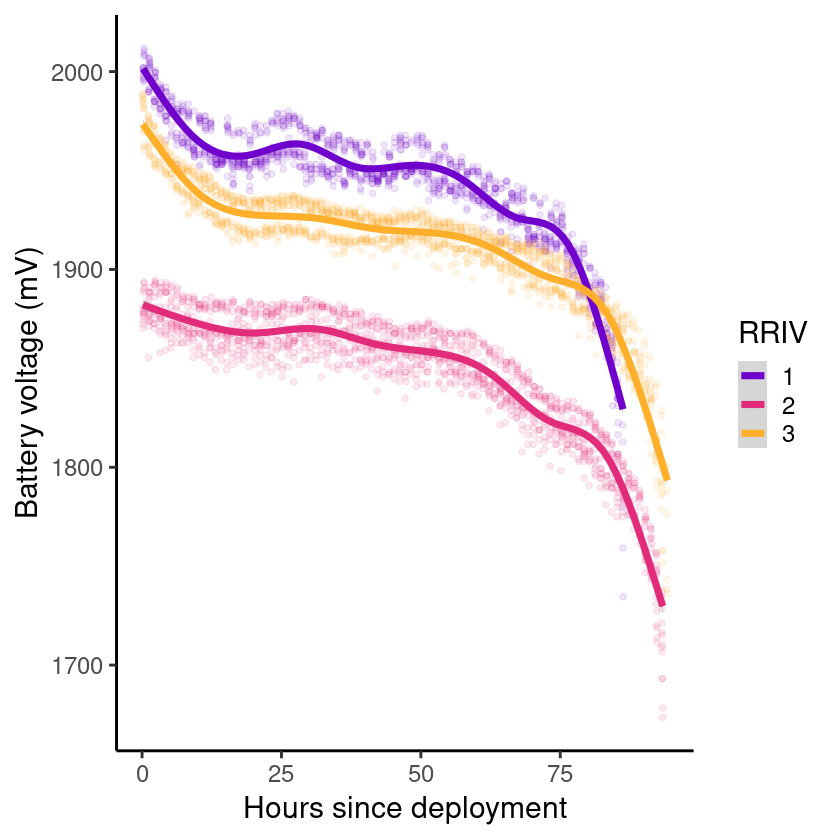

In [57]:
g25<-ggplot(ghg25_summary_3, aes(x=timeDiff,y=battery.mV,color=RRIV))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery voltage (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)
g25

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



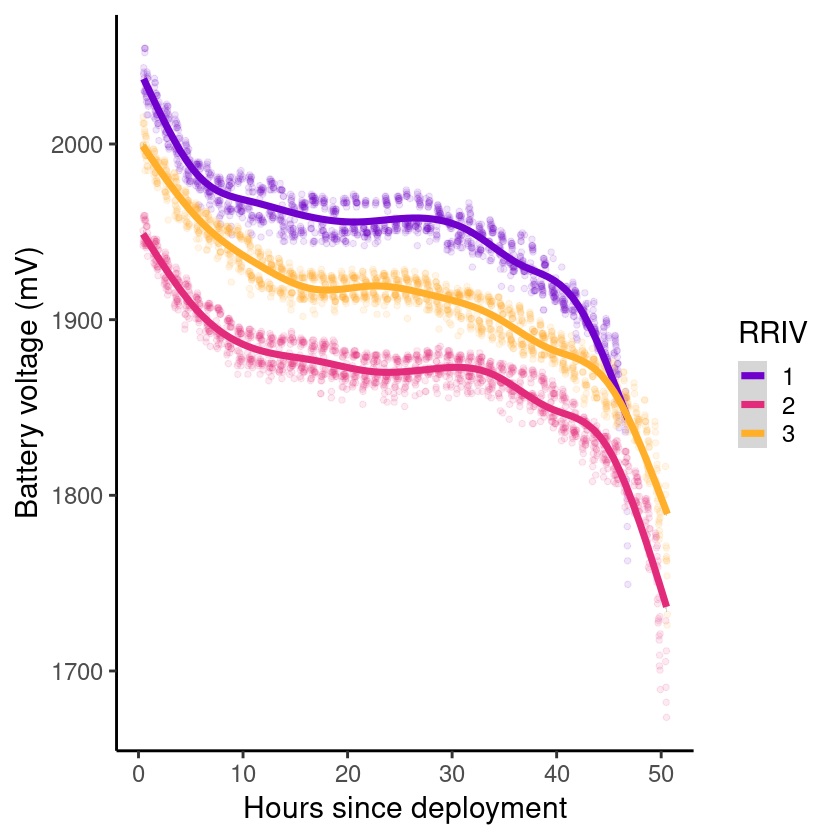

In [58]:
g50<-ggplot(ghg50_summary_3, aes(x=timeDiff,y=battery.mV,color=RRIV))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery voltage (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)
g50

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



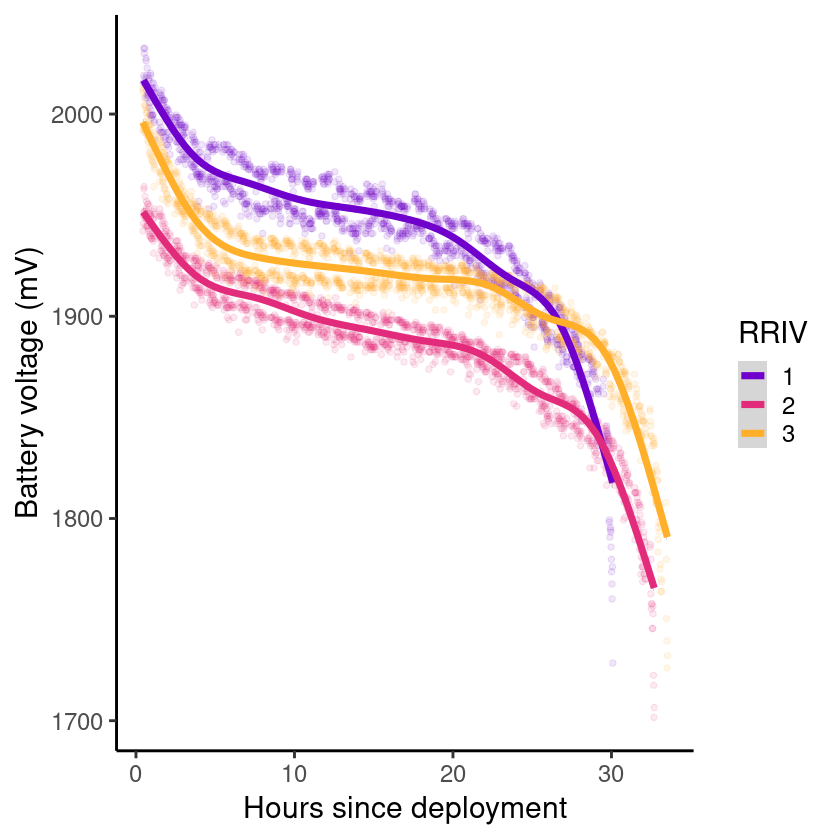

In [59]:
g75<-ggplot(ghg75_summary_3, aes(x=timeDiff,y=battery.mV,color=RRIV))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery voltage (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)
g75

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



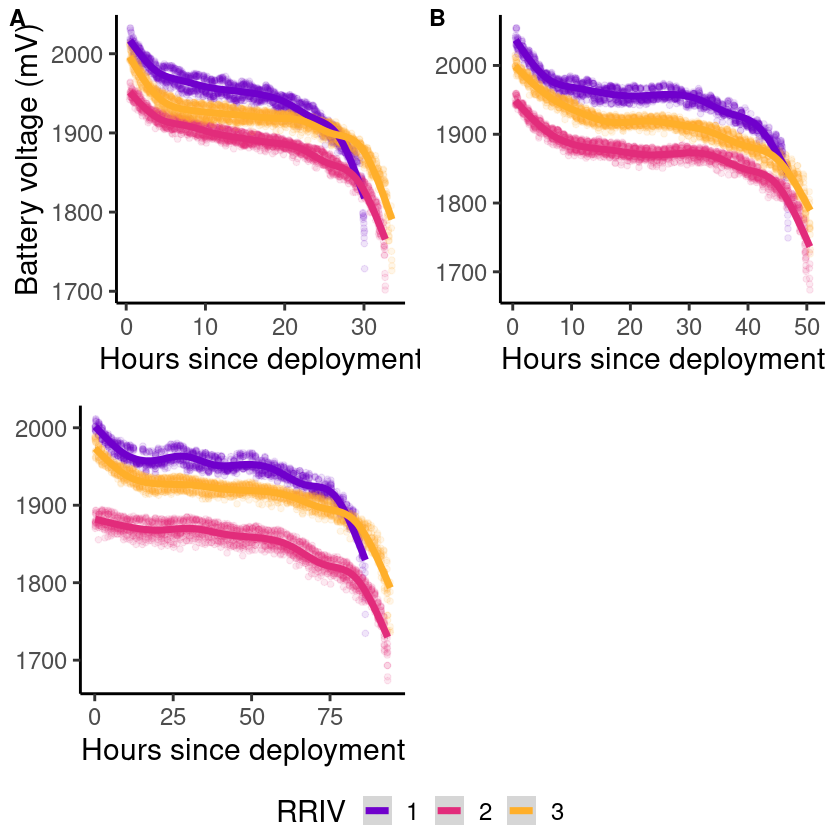

In [60]:
ghg_dutyCycle<-ggarrange(g75,g50+rremove("y.title"),g25+rremove("y.title"),
                         labels=c("A","B"),
                         common.legend=TRUE,
                         legend="bottom")
ghg_dutyCycle

# savePlot(plot=ghg_dutyCycle,tag = "ghg_dutyCycle_0")

In [61]:
# plot on same axis
ghg_full<-rbind(ghg75_summary_3, ghg50_summary_3, ghg25_summary_3)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



png 
  2

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



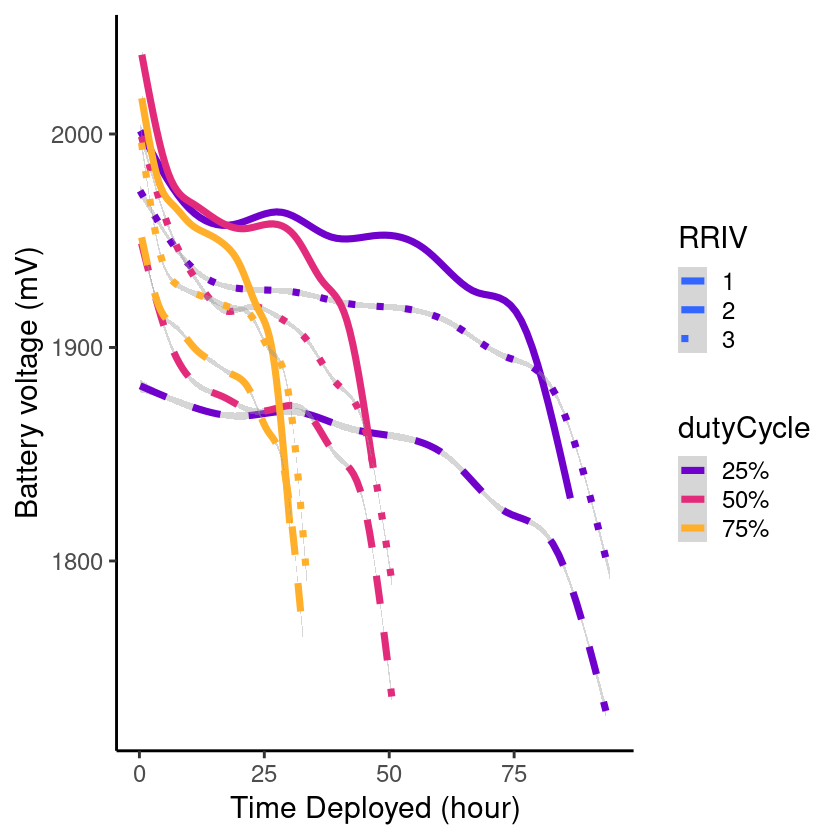

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



png 
  2

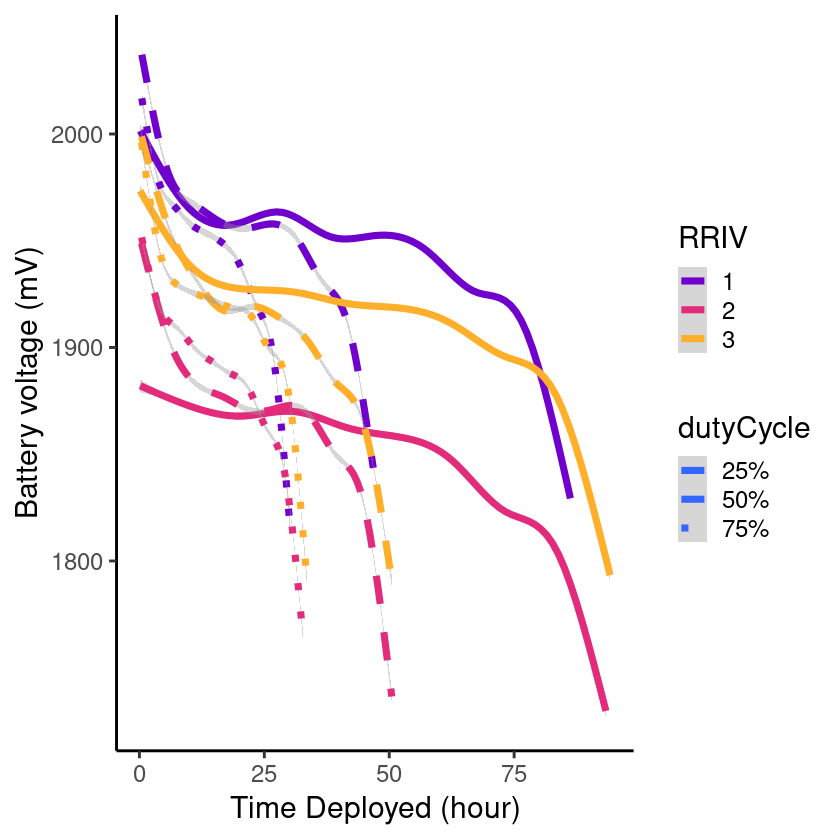

In [62]:
gfull<-ggplot(ghg_full, aes(x=timeDiff,y=battery.mV,color=dutyCycle, linetype=RRIV))+
    theme_classic(base_size=18)+
    labs(x="Time Deployed (hour)",y="Battery voltage (mV)")+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)+
    scale_linetype_manual(values = c("solid","dashed","dotted"))
gfull

savePlot(plot=gfull,tag = "gfull3")



gfull2<-ggplot(ghg_full, aes(x=timeDiff,y=battery.mV,color=RRIV, linetype=dutyCycle))+
    theme_classic(base_size=18)+
    labs(x="Time Deployed (hour)",y="Battery voltage (mV)")+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)+
    scale_linetype_manual(values = c("solid","dashed","dotted"))
gfull2

savePlot(plot=gfull2,tag = "gfull4")

# Dissipation test 1000ppm - 2ppm side by side comparison
3x in sensor case
3x no case

In [63]:
ch4dissipation_data$ch4_mV<-ch4dissipation_data$ch4_raw*5000/4096
ch4dissipation_data$deployTime<-(ch4dissipation_data$time.s-ch4dissipation_data$deployed_at)/(60*60)
head(ch4dissipation_data)


ch4d_raw<-ch4dissipation_data[ch4dissipation_data$type=="raw",]
ch4d_summary<-ch4dissipation_data[ch4dissipation_data$type=="summary",]

type site logger deployment                                   deployed_at
1 raw  C1   21010  calCH001-57FF70068387575129270167-1677514287 1677514287 
2 raw  C1   21010  calCH001-57FF70068387575129270167-1677514287 1677514287 
3 raw  C1   21010  calCH001-57FF70068387575129270167-1677514287 1677514287 
4 raw  C1   21010  calCH001-57FF70068387575129270167-1677514287 1677514287 
5 raw  C1   21010  calCH001-57FF70068387575129270167-1677514287 1677514287 
6 raw  C1   21010  calCH001-57FF70068387575129270167-1677514287 1677514287 
  uuid                     time.s     time.h              battery.V
1 57FF70068387575129270167 1677528005 2023-02-27 20:00:05 1320     
2 57FF70068387575129270167 1677528007 2023-02-27 20:00:07 1002     
3 57FF70068387575129270167 1677528010 2023-02-27 20:00:09 1162     
4 57FF70068387575129270167 1677528012 2023-02-27 20:00:12 1630     
5 57FF70068387575129270167 1677528015 2023-02-27 20:00:14 1338     
6 57FF70068387575129270167 1677528017 2023-02-27 20:00:17 1382     
  measurementCycle ⋯ dht_C dht_RH ch4rf_raw ch4rf_cal ch4_raw ch4_cal user_note
1 4                ⋯ 19.8  18.6   1856      0         2305    0       NA       
2 4                ⋯ 19.8  18.6   1849      0         1540    0       NA       
3 4                ⋯ 19.8  18.6   1851      0         1200    0       NA       
4 4                ⋯ 19.8  18.6   1849      0         1020    0       NA       
5 4                ⋯ 19.8  18.6   1851      0          915    0       NA       
6 4                ⋯ 19.6  20.1   1849      0          853    0       NA       
  user_value ch4_mV   deployTime
1 NA         2813.721 3.810557  
2 NA         1879.883 3.811237  
3 NA         1464.844 3.811922  
4 NA         1245.117 3.812602  
5 NA         1116.943 3.813289  
6 NA         1041.260 3.813970

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



[1] "2023-02-27 20:00:26 UTC" "2023-03-01 15:03:27 UTC"

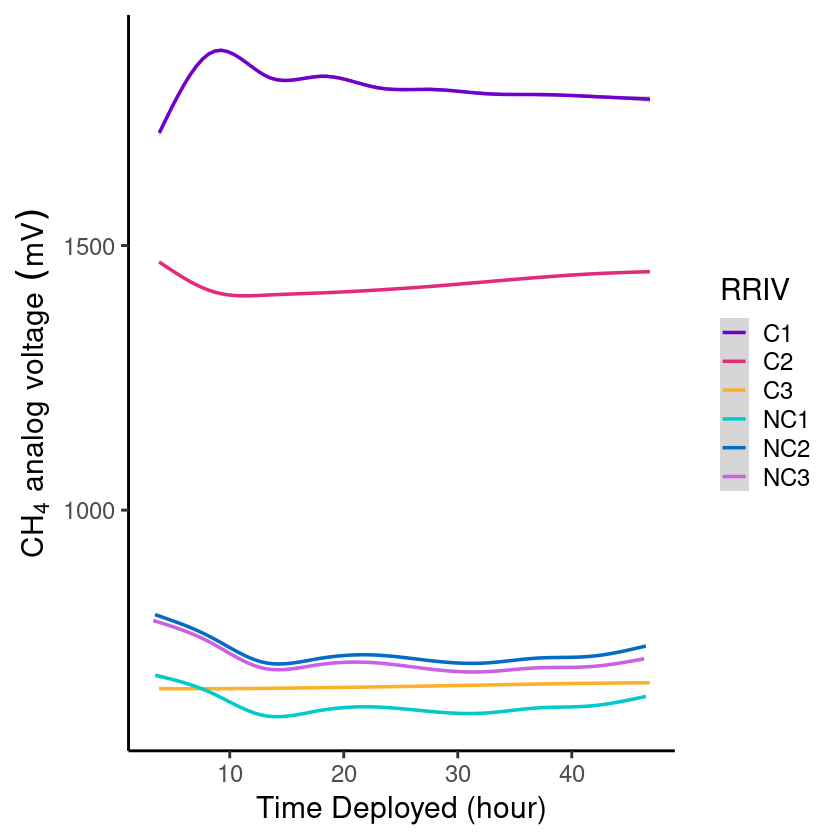

In [64]:
ggplot(data=ch4d_summary, aes(x=deployTime,y=ch4_mV,color=site))+geom_smooth()+
    theme_classic(base_size=18)+
    labs(x="Time Deployed (hour)",y=CH[4]~analog~voltage~(mV), color="RRIV")+
    scale_color_manual(values=custom_colors)

range(ch4d_summary$time.h)

[1] "2023-02-27 21:10:27 UTC" "2023-03-01 15:03:27 UTC"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



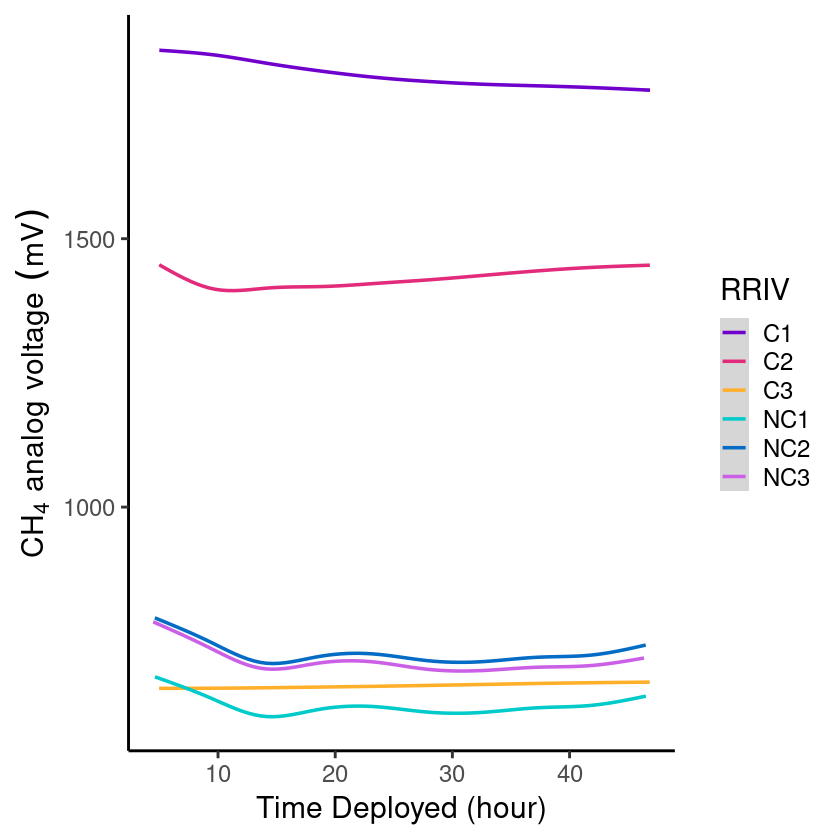

In [65]:
# remove warmup time
ch4d_subset<-ch4d_summary[ch4d_summary$time.h>range(ch4d_summary$time.h)[1]+70*60,]

range(ch4d_subset$time.h)

ggplot(data=ch4d_subset, aes(x=deployTime,y=ch4_mV,color=site))+geom_smooth()+
    theme_classic(base_size=18)+
    labs(x="Time Deployed (hour)",y=CH[4]~analog~voltage~(mV), color="RRIV")+
    scale_color_manual(values=custom_colors)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



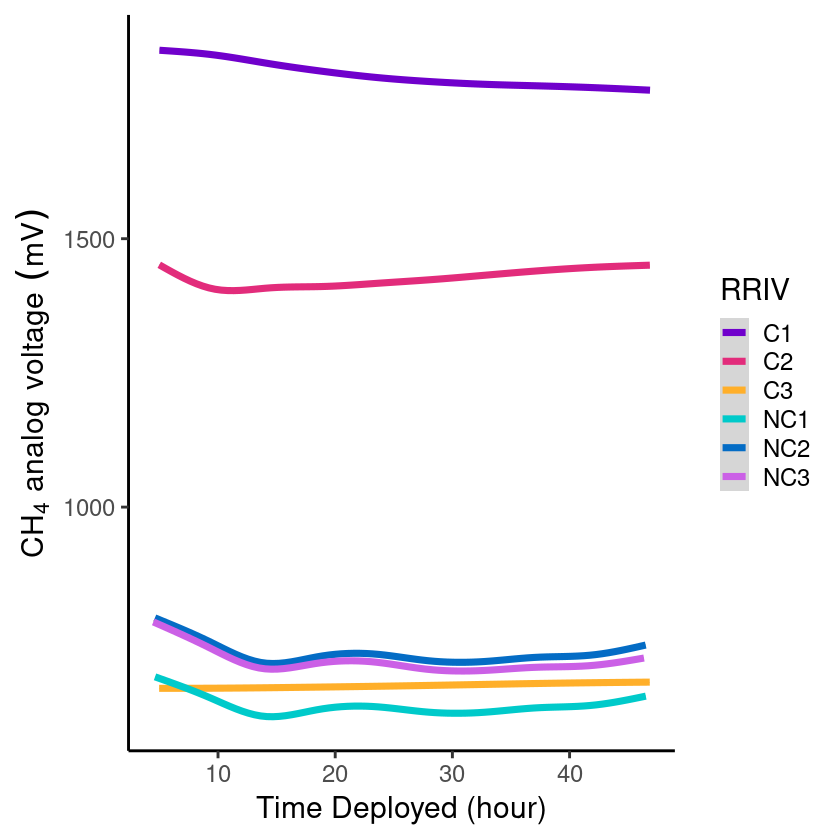

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



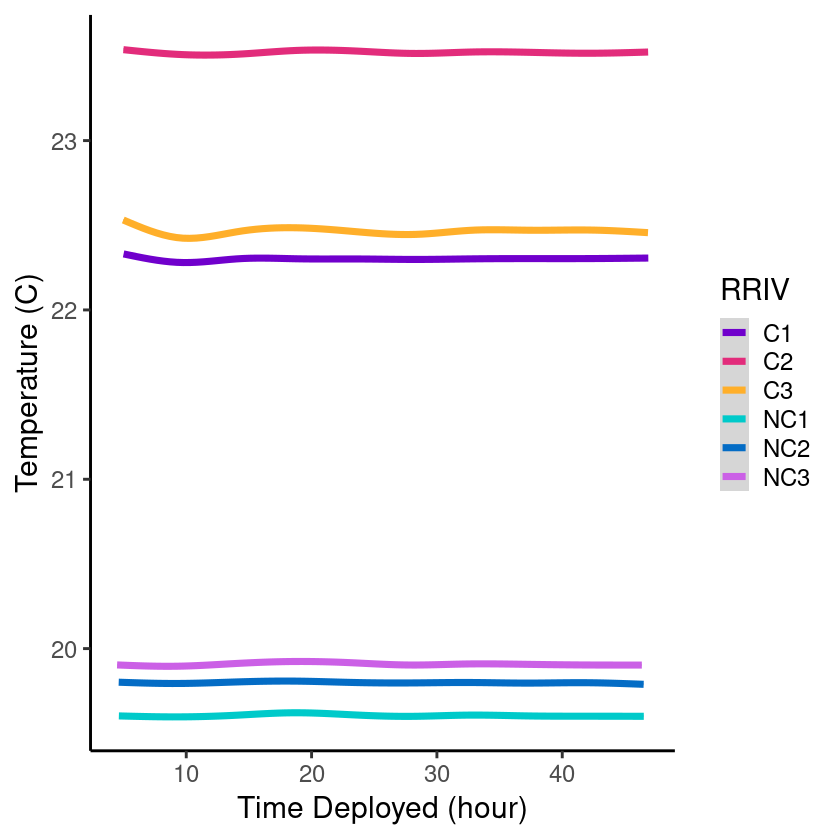

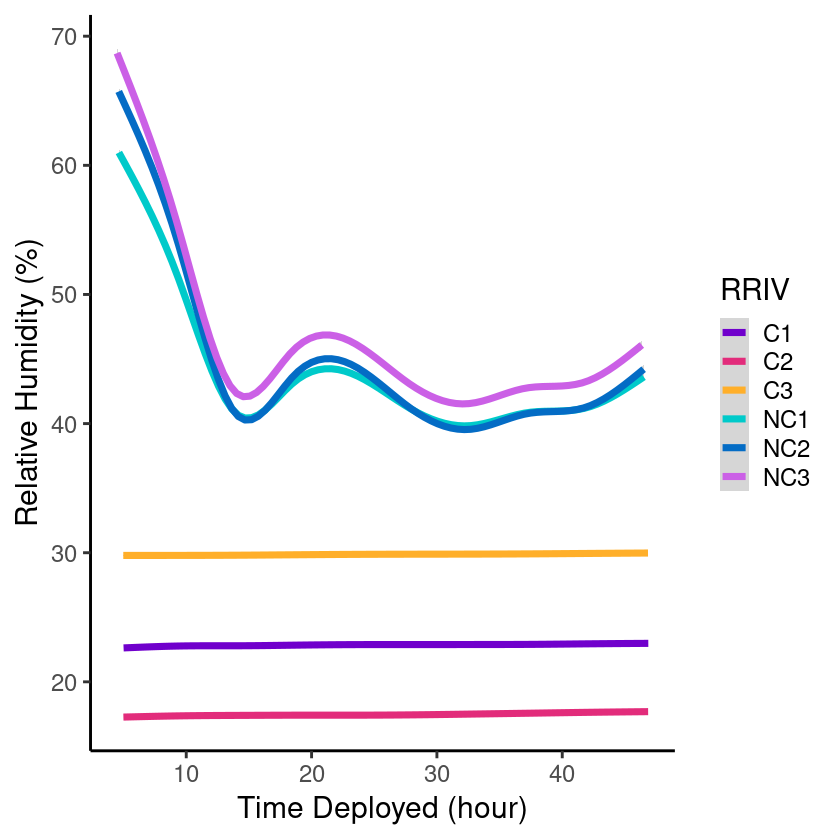

In [66]:
ch4d_a<-ggplot(data=ch4d_subset, aes(x=deployTime,y=ch4_mV,color=site))+geom_smooth(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time Deployed (hour)",y=CH[4]~analog~voltage~(mV), color="RRIV")+
    scale_color_manual(values=custom_colors)
ch4d_a

ch4d_b<-ggplot(data=ch4d_subset, aes(x=deployTime,y=dht_C,color=site))+geom_smooth(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time Deployed (hour)",y="Temperature (C)", color="RRIV")+
    scale_color_manual(values=custom_colors)
ch4d_b

ch4d_c<-ggplot(data=ch4d_subset, aes(x=deployTime,y=dht_RH,color=site))+geom_smooth(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time Deployed (hour)",y="Relative Humidity (%)", color="RRIV")+
    scale_color_manual(values=custom_colors)
ch4d_c

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



png 
  2

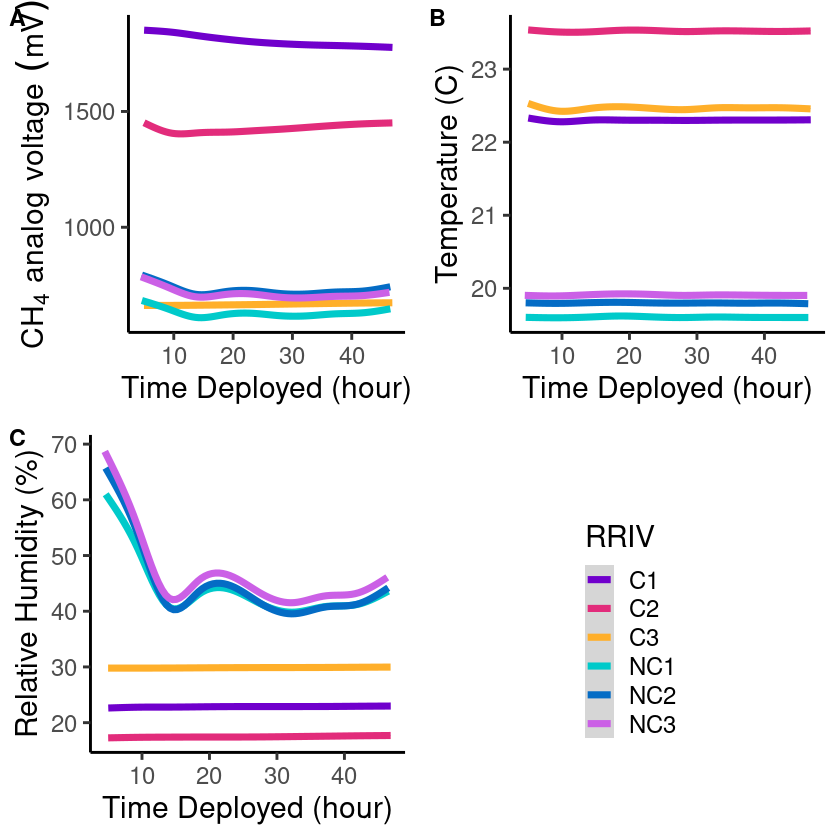

In [67]:
leg<-get_legend(ch4d_a)

ch4da<-ch4d_a+theme(legend.position="none")
ch4db<-ch4d_b+theme(legend.position="none")
ch4dc<-ch4d_c+theme(legend.position="none")

caseVsNoCase<-ggarrange(ch4da, ch4db, ch4dc, leg, labels = c("A","B","C"))
caseVsNoCase

savePlot(plot=caseVsNoCase,tag = "caseVsNoCase0")

# PWA Dock experiment # 2 various bucket configurations
1. 7L bucket with ch4 sensor epoxied in
2. 7L floating chamber configuration, ch4 sensor epoxied in, air pump holes applied
3. 7L bucket with ch4 sensor epoxied in, and co2 with a cable gland
4. 7L bucket with ch4 epoxied in and LGR connected
5. 5gal bucket with ch4 epoxied in

note: no sensors were in sensor cases

In [68]:
# convert LGR Time column from character to datetime
pdock2_lgr$Time<-as_datetime(pdock2_lgr$Time)

In [69]:
pdock2_rriv<-as.data.frame(pdock2_rriv)

In [70]:
pdock2_rriv$ch4_mV<-pdock2_rriv$ch4_raw*5000/4096

In [71]:
UUIDdict=c(
    "57FF6E068387575148360767"="1", # ch4 epoxied
    "57FF6D068387575151290167"="2", # floating bucket ch4 epoxied with air pump holes
    "57FF6F068387575149330867"="3", # ch4 epoxied + co2 cable gland
    "57FF6E068387575140070767"="4", # rriv ch4 epoxied + lgr
    "50FF74068678545256252467"="5") # tall bucket with rriv ch4 epoxied in
pdock2_rriv<-createSensorColFromIDs(pdock2_rriv,idCol = "uuid",dict = UUIDdict)

In [72]:
pd2_r_raw<-pdock2_rriv[pdock2_rriv$type=="raw",]
pd2_r_summary<-pdock2_rriv[pdock2_rriv$type=="summary",]

In [73]:
pd2_r_range<-range(pd2_r_summary$time.h)

pd2_lgr_range<-range(pdock2_lgr$Time)

overlapStart<-max(pd2_r_range[1],pd2_lgr_range[1])+5*60
overlapEnd<-min(pd2_r_range[2],pd2_lgr_range[2])

pd2_r<-pd2_r_summary[pd2_r_summary$time.h>overlapStart & pd2_r_summary$time.h<overlapEnd,]
pd2_l<-pdock2_lgr[pdock2_lgr$Time>overlapStart &pdock2_lgr$Time<overlapEnd,]

In [74]:
names(pd2_r)

[1] "type"             "site"             "logger"           "deployment"      
 [5] "deployed_at"      "uuid"             "time.s"           "time.h"          
 [9] "battery.V"        "measurementCycle" "burstCycle"       "aht_C"           
[13] "aht_RH"           "ch4_raw"          "ch4_cal"          "user_note"       
[17] "user_value"       "co2_CO2_ppm"      "ch4_mV"           "Sensor"

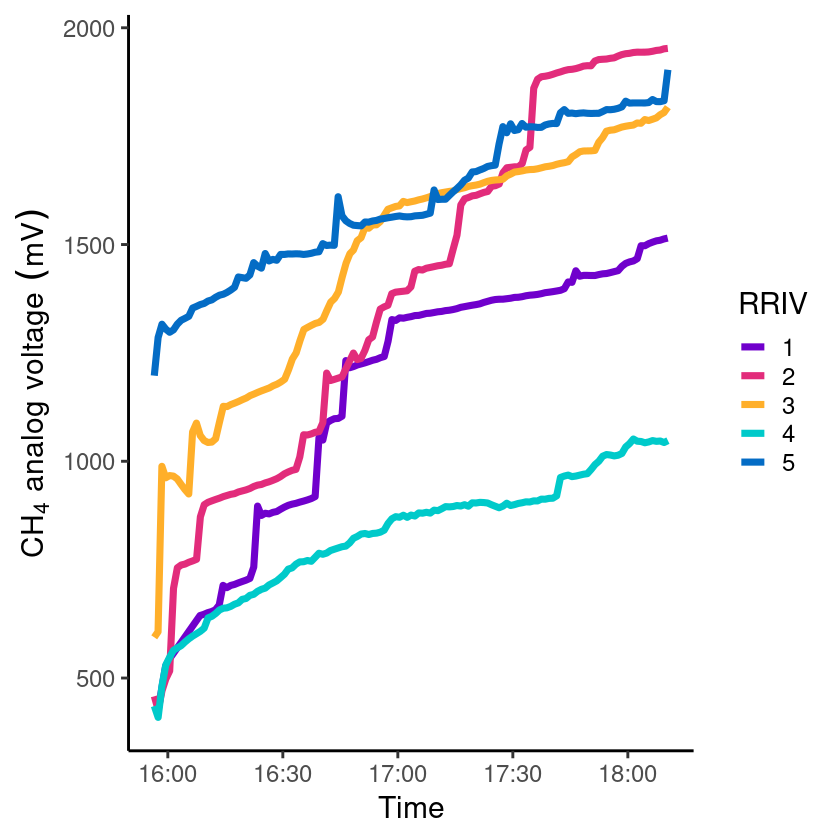

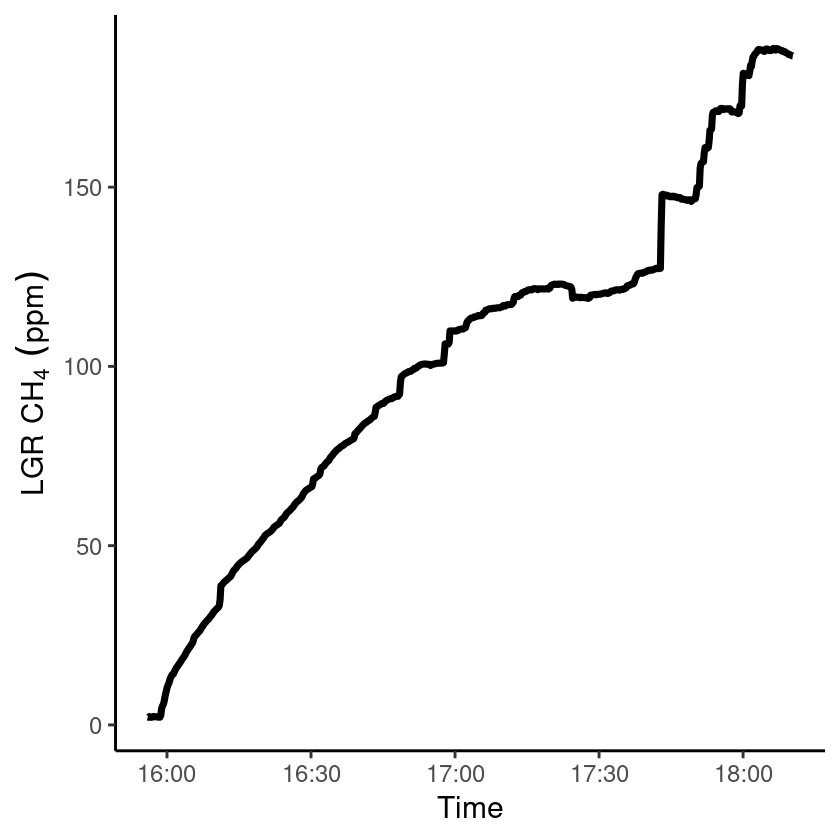

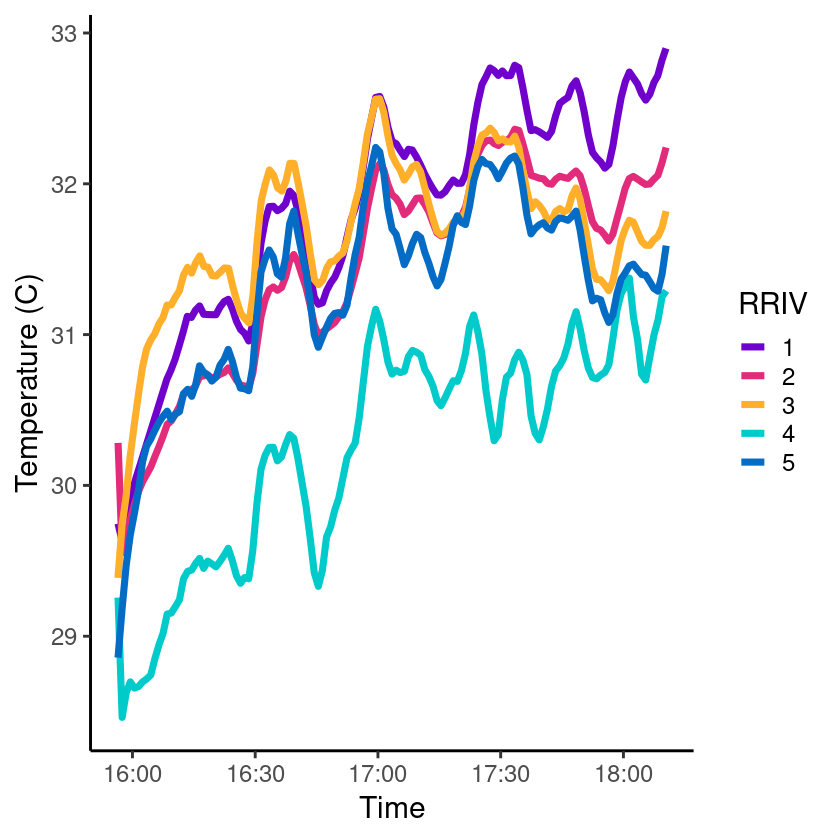

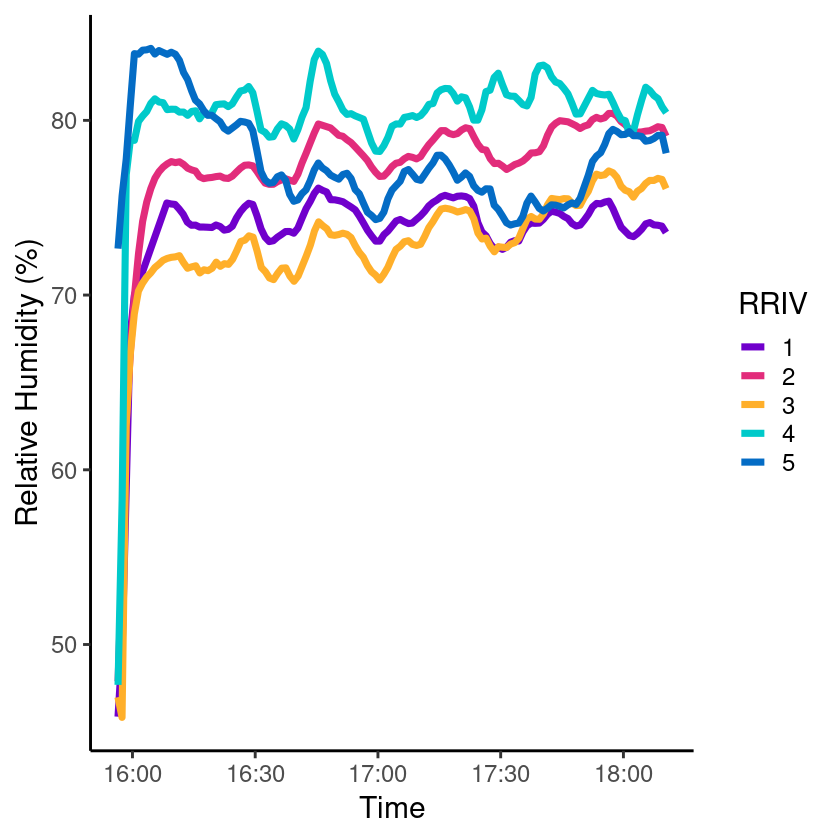

In [75]:
a<-ggplot(data=pd2_r, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_line(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time",y=CH[4]~analog~voltage~(mV), color="RRIV")+
    scale_color_manual(values=custom_colors)
a

b<-ggplot(data=pd2_l, aes(x=Time,y=X.CH4._ppm))+geom_line(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time",y=LGR~CH[4]~(ppm), color="RRIV")
b

c<-ggplot(data=pd2_r, aes(x=time.h, y=aht_C, color=Sensor))+geom_line(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time",y="Temperature (C)", color="RRIV")+
    scale_color_manual(values=custom_colors)
c

d<-ggplot(data=pd2_r, aes(x=time.h, y=aht_RH, color=Sensor))+geom_line(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time",y="Relative Humidity (%)", color="RRIV")+
    scale_color_manual(values=custom_colors)
d

In [76]:
class(a)
class(b)

[1] "gg"     "ggplot"

[1] "gg"     "ggplot"

png 
  2

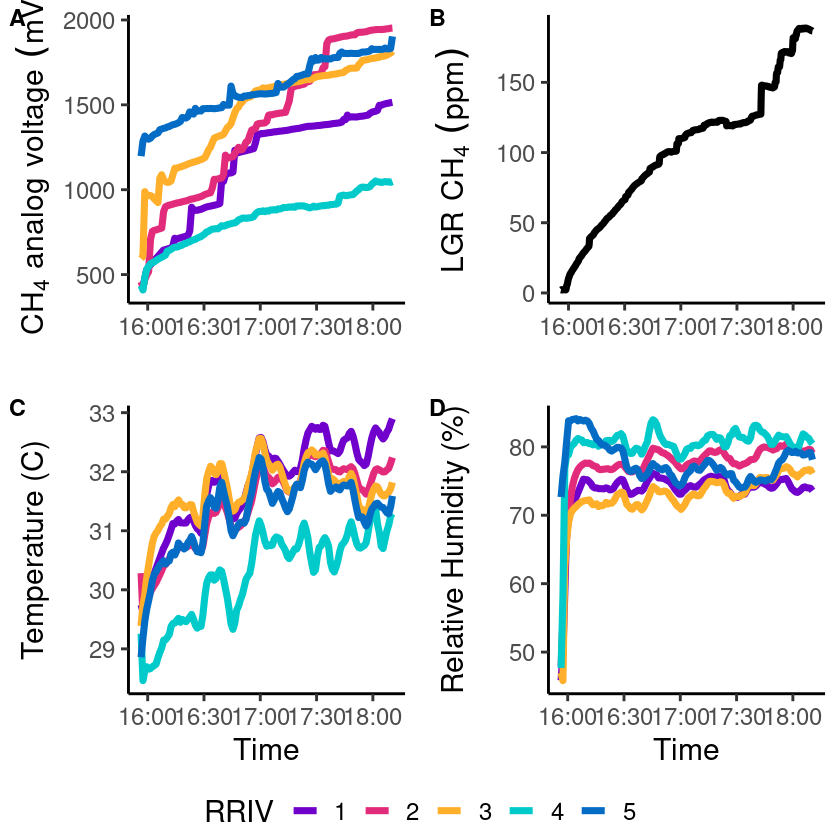

In [77]:
containerComparison<-ggarrange(a+rremove("x.title"), b+rremove("x.title"), c, d,
          labels = c("A","B","C","D"), common.legend = TRUE, legend="bottom", align=c("hv"))
containerComparison

savePlot(plot=containerComparison, tag="containerComparison1", width=1000, height=1000)

In [78]:
outputDir

[1] "~/Desktop/waterbear/thesisFigures"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



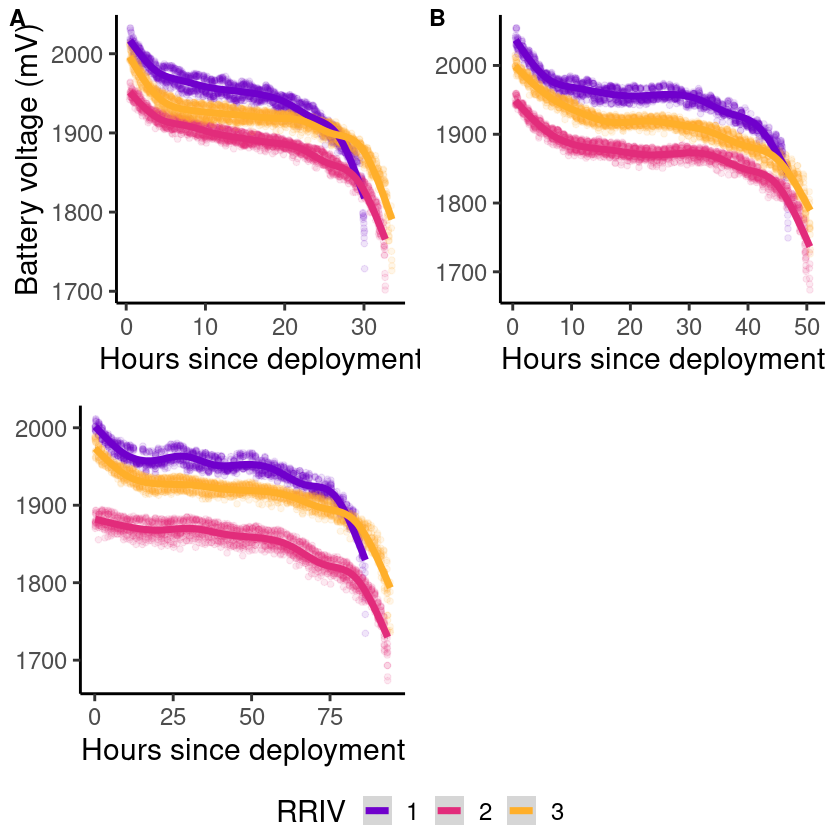

In [79]:
ghg_dutyCycle<-ggarrange(g75,g50+rremove("y.title"),g25+rremove("y.title"),
                         labels=c("A","B"),
                         common.legend=TRUE,
                         legend="bottom")
ghg_dutyCycle

# savePlot(plot=ghg_dutyCycle,tag = "ghg_dutyCycle_0")

In [80]:
names(pdock2_lgr)

[1] "Time"               "X.CH4._ppm"         "X.CH4._ppm_sd"     
 [4] "X.CO2._ppm"         "X.CO2._ppm_sd"      "X.H2O._ppm"        
 [7] "X.H2O._ppm_sd"      "X.CH4.d_ppm"        "X.CH4.d_ppm_sd"    
[10] "X.CO2.d_ppm"        "X.CO2.d_ppm_sd"     "GasP_torr"         
[13] "GasP_torr_sd"       "GasT_C"             "GasT_C_sd"         
[16] "AmbT_C"             "AmbT_C_sd"          "RD0_us"            
[19] "RD0_us_sd"          "RD1_us"             "RD1_us_sd"         
[22] "RD0_raw_us"         "LTC0_v"             "LTC0_v_sd"         
[25] "LTC1_v"             "LTC1_v_sd"          "HZ"                
[28] "HZ_sd"              "Batt_v"             "Batt_v_sd"         
[31] "BattPer"            "BattPer_sd"         "Temp_Status_mA"    
[34] "Analyzer_Status_mA" "Fit_Flag"           "MIU_VALVE"         
[37] "MIU_DESC"

## rriv co2 and lgr co2 were in different buckets. lgr is known to have leaks, so it's understandable that values not as high, but also have seen inconsistencies in atlas co2 calibrations

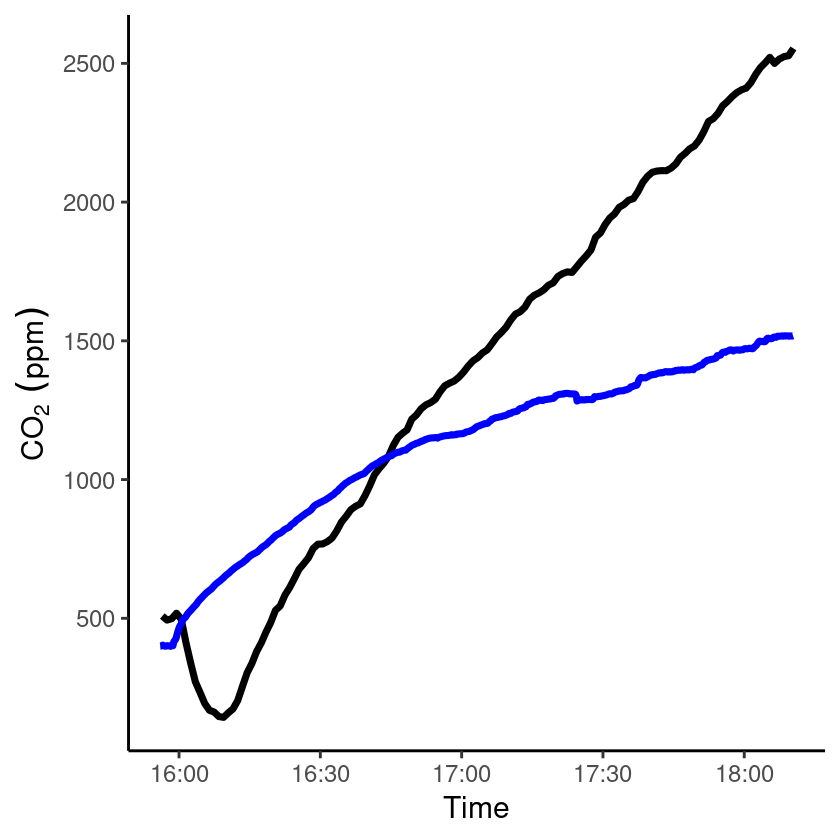

In [81]:
# black line is RRIV data
# blue line is LGR data

ggplot()+
    geom_line(data=pd2_r[pd2_r$Sensor=="3",], aes(x=time.h, y=as.numeric(co2_CO2_ppm)), size=2)+
    geom_line(data=pd2_l, aes(x=Time,y=X.CO2._ppm), color="blue", size=2)+
    theme_classic(base_size = 18)+
    labs(x="Time", y=CO[2]~(ppm))

#note, melt for a better graph

In [82]:
names(pd2_r)

[1] "type"             "site"             "logger"           "deployment"      
 [5] "deployed_at"      "uuid"             "time.s"           "time.h"          
 [9] "battery.V"        "measurementCycle" "burstCycle"       "aht_C"           
[13] "aht_RH"           "ch4_raw"          "ch4_cal"          "user_note"       
[17] "user_value"       "co2_CO2_ppm"      "ch4_mV"           "Sensor"

## gams for pdock run

In [83]:
outputDirectory<-paste0(outputDir,"/modelStats/")
newDir(outputDirectory)

Output directory, ~/Desktop/waterbear/thesisFigures/modelStats/, already exists


In [84]:
head(pd2_r)
head(pd2_l)

type    site   logger deployment                                    
453 summary pdock1 CAL1   pdock-rriv-57FF6E068387575148360767-1687285497
464 summary pdock1 CAL1   pdock-rriv-57FF6E068387575148360767-1687285497
466 summary pdock1 CAL1   pdock-rriv-57FF6E068387575148360767-1687285497
477 summary pdock1 CAL1   pdock-rriv-57FF6E068387575148360767-1687285497
498 summary pdock1 CAL1   pdock-rriv-57FF6E068387575148360767-1687285497
509 summary pdock1 CAL1   pdock-rriv-57FF6E068387575148360767-1687285497
    deployed_at uuid                     time.s     time.h             
453 1687285497  57FF6E068387575148360767 1687362988 2023-06-21 15:56:28
464 1687285497  57FF6E068387575148360767 1687363048 2023-06-21 15:57:28
466 1687285497  57FF6E068387575148360767 1687363166 2023-06-21 15:59:25
477 1687285497  57FF6E068387575148360767 1687363228 2023-06-21 16:00:28
498 1687285497  57FF6E068387575148360767 1687363704 2023-06-21 16:08:23
509 1687285497  57FF6E068387575148360767 1687363764 2023-06-21 16:09:23
    battery.V measurementCycle burstCycle aht_C  aht_RH ch4_raw ch4_cal
453 1073      35849            42         29.747 45.868 424.1   0      
464 1078      35849            43         29.631 49.674 427.0   0      
466 1101      35849            45         29.876 67.698 527.8   0      
477 1112      35849            46         30.015 70.006 544.6   0      
498 1145      35850            1          30.703 75.270 644.1   0      
509 1145      35850            2          30.764 75.216 646.9   0      
    user_note user_value co2_CO2_ppm ch4_mV   Sensor
453 NA        NA         NA          517.7002 1     
464 NA        NA         NA          521.2402 1     
466 NA        NA         NA          644.2871 1     
477 NA        NA         NA          664.7949 1     
498 NA        NA         NA          786.2549 1     
509 NA        NA         NA          789.6729 1

Time                X.CH4._ppm X.CH4._ppm_sd X.CO2._ppm X.CO2._ppm_sd
31 2023-06-21 15:56:00 2.19461    0             399.608    0            
32 2023-06-21 15:56:10 2.13480    0             399.890    0            
33 2023-06-21 15:56:20 2.30738    0             401.013    0            
34 2023-06-21 15:56:30 2.20940    0             403.186    0            
35 2023-06-21 15:56:40 2.11027    0             402.418    0            
36 2023-06-21 15:56:50 2.14739    0             401.325    0            
   X.H2O._ppm X.H2O._ppm_sd X.CH4.d_ppm X.CH4.d_ppm_sd X.CO2.d_ppm ⋯ HZ_sd
31 19881.8    0             2.23912     0              407.714     ⋯ 0    
32 19947.7    0             2.17825     0              408.029     ⋯ 0    
33 20252.6    0             2.35508     0              409.302     ⋯ 0    
34 20171.2    0             2.25489     0              411.487     ⋯ 0    
35 19422.9    0             2.15207     0              410.389     ⋯ 0    
36 19584.5    0             2.19028     0              409.341     ⋯ 0    
   Batt_v  Batt_v_sd BattPer BattPer_sd Temp_Status_mA Analyzer_Status_mA
31 5.24108 0         97.6834 0          20             20                
32 5.24069 0         97.6599 0          20             20                
33 5.24014 0         97.6275 0          20             20                
34 5.23931 0         97.5782 0          20             20                
35 5.23863 0         97.5375 0          20             20                
36 5.23784 0         97.4903 0          20             20                
   Fit_Flag MIU_VALVE MIU_DESC
31 3        8         NA      
32 3        1         NA      
33 3        2         NA      
34 3        3         NA      
35 3        4         NA      
36 3        5         NA

In [85]:
# list of sensors
sensorList<-unique(pd2_r$Sensor)

# hold data
interpolated_data<-vector("list",length(sensorList))
names(interpolated_data)<-sensorList

for(sensor in sensorList){
    subset<-pd2_r[pd2_r$Sensor==sensor,]
    temp<-interpolateData(df1=subset,df2=pd2_l)
    temp$Sensor=sensor
    interpolated_data[[sensor]]<-temp
}

# str(interpolated_data)

interpolated_df<-do.call(rbind, interpolated_data)
str(interpolated_df)

[1] "df2 time range is larger"
[1] "df2 time range is larger"
[1] "df2 time range is larger"
[1] "df2 time range is larger"
[1] "df2 time range is larger"
'data.frame':	670 obs. of  6 variables:
 $ time_utc    : POSIXct, format: "2023-06-21 15:57:00" "2023-06-21 15:58:00" ...
 $ ch4_raw_rriv: num  426 454 506 537 551 ...
 $ aht_C       : num  29.7 29.7 29.8 30 30.1 ...
 $ aht_RH      : num  47.9 54.6 63.8 69 70.4 ...
 $ ch4_ppm_lgr : num  2.24 2.21 5.04 10.25 13.81 ...
 $ Sensor      : chr  "1" "1" "1" "1" ...


In [86]:
names(interpolated_df)

[1] "time_utc"     "ch4_raw_rriv" "aht_C"        "aht_RH"       "ch4_ppm_lgr" 
[6] "Sensor"

In [87]:
pdGAM<-vector("list",length(sensorList))
names(pdGAM)<-sensorList

pdGAM_summary<-vector("list",length(sensorList))
names(pdGAM_summary)<-sensorList


for(sensor in sensorList){
    subset<-interpolated_df[interpolated_df$Sensor==sensor,]
    pdGAM[[sensor]]<-mgcv::gam(ch4_ppm_lgr~s(ch4_raw_rriv)+s(aht_C)+s(aht_RH),data=subset)
    print(sensor)
    
    sum<-summary(pdGAM[[sensor]])
    pdGAM_summary[[sensor]]<-sum
    
    outFile<-paste0(outputDirectory,"sensor_", sensor,"_gam.txt")
    writeFile(capture.output(sum), outFile)
}

[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"


In [88]:
# for (i in pdGAM_summary){
#     print(i)
# }

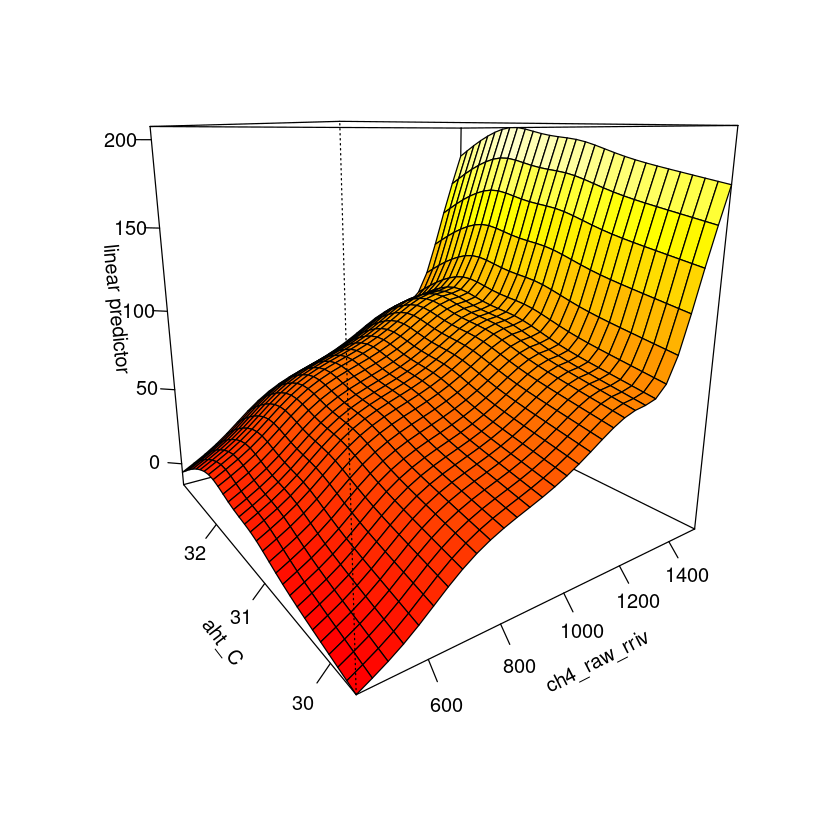

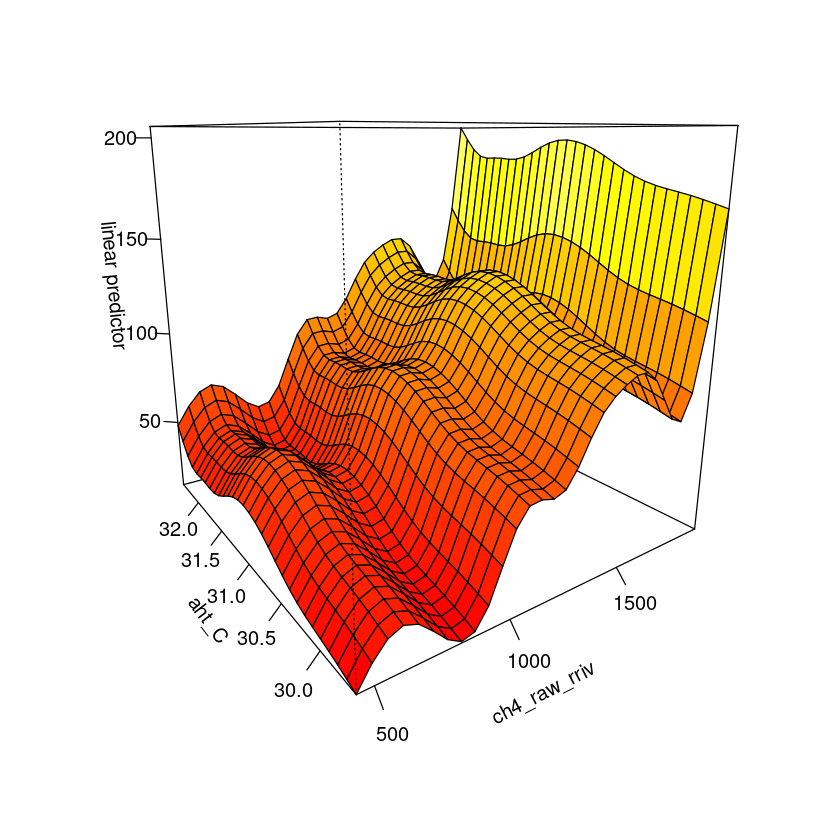

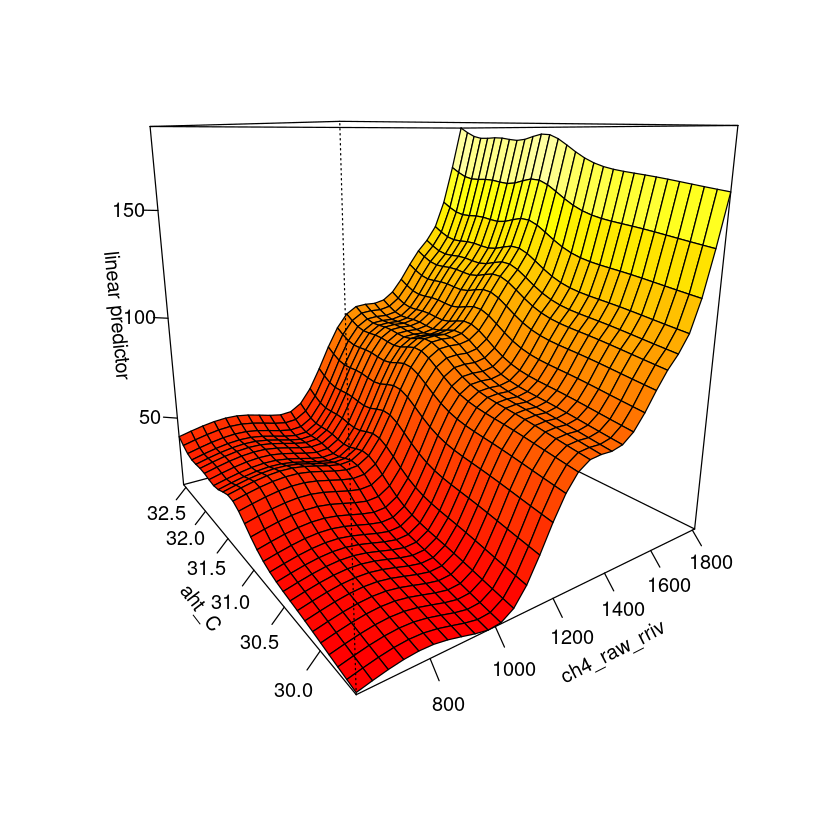

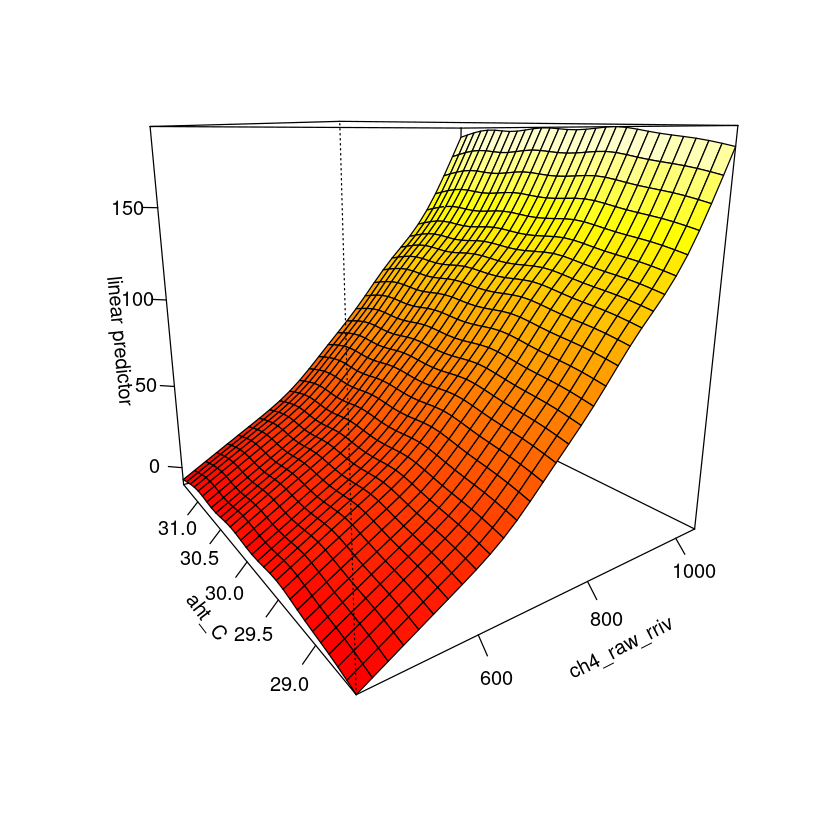

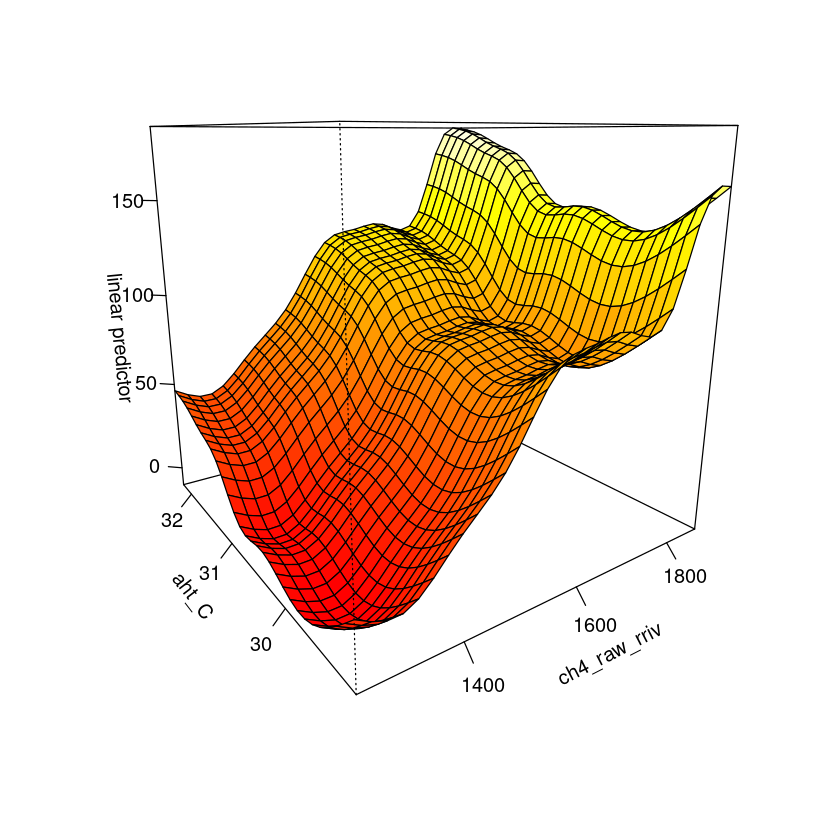

In [89]:
vis.gam(pdGAM[[1]],ticktype="detailed",color="heat",theta=-35)

vis.gam(pdGAM[[2]],ticktype="detailed",color="heat",theta=-35)

vis.gam(pdGAM[[3]],ticktype="detailed",color="heat",theta=-35)

vis.gam(pdGAM[[4]],ticktype="detailed",color="heat",theta=-35)

vis.gam(pdGAM[[5]],ticktype="detailed",color="heat",theta=-35)

In [90]:
pdLM<-vector("list",length(sensorList))
names(pdLM)<-sensorList

pdLM_summary<-vector("list",length(sensorList))
names(pdLM_summary)<-sensorList


for(sensor in sensorList){
    subset<-interpolated_df[interpolated_df$Sensor==sensor,]
    pdLM[[sensor]]<-lm(data=subset, formula=ch4_ppm_lgr~ch4_raw_rriv+aht_C+aht_RH )
    print(sensor)
    
    sum<-summary(pdLM[[sensor]])
    pdLM_summary[[sensor]]<-sum
    outFile<-paste0(outputDirectory,"sensor_", sensor,"_lm_additive.txt")
    writeFile(capture.output(sum), outFile)
}


pdLM2<-vector("list",length(sensorList))
names(pdLM2)<-sensorList

pdLM_summary2<-vector("list",length(sensorList))
names(pdLM_summary2)<-sensorList

for(sensor in sensorList){
    subset<-interpolated_df[interpolated_df$Sensor==sensor,]
    pdLM2[[sensor]]<-lm(data=subset, formula=ch4_ppm_lgr~ch4_raw_rriv*aht_C*aht_RH )
    print(sensor)
    
    sum<-summary(pdLM2[[sensor]])
    pdLM_summary2[[sensor]]<-sum
    
    outFile<-paste0(outputDirectory,"sensor_", sensor,"_lm_interactive.txt")
    writeFile(capture.output(sum), outFile)
}

[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"


In [91]:
# for (i in pdLM_summary){
#     print(i)
# }

In [92]:
# for (i in pdLM_summary2){
#     print(i)
# }

# Case vs No Case

In [93]:
# head(cNc_rriv)
# head(cNc_lgr)

cNc_lgr$Time<-as_datetime(cNc_lgr$Time)

In [94]:
unique(cNc_rriv$uuid)

UUIDdict=c(
    "50FF6B068678545244122467"=1,
    "57FF6B068387575132401167"=2,
    "50FF70068678545243102367"=3,
    "50FF6C068678545210362467"=4 )

cNc_rriv<-createSensorColFromIDs(cNc_rriv, "uuid", UUIDdict)
cNc_rriv$Sensor<-as.factor(cNc_rriv$Sensor)

[1] 50FF6B068678545244122467 57FF6B068387575132401167 50FF70068678545243102367
[4] 50FF6C068678545210362467
4 Levels: 50FF6B068678545244122467 ... 57FF6B068387575132401167

In [95]:
cNc_r_raw<-cNc_rriv[cNc_rriv$type=="raw",]
cNc_r_summary<-cNc_rriv[cNc_rriv$type=="summary",]

In [96]:
# sensor 2 has no summary values, dht didn't work, duplicate values from C2 for C1
unique(cNc_r_summary$uuid)

[1] 50FF6B068678545244122467 50FF70068678545243102367 50FF6C068678545210362467
4 Levels: 50FF6B068678545244122467 ... 57FF6B068387575132401167

In [97]:
# head(cNc_r_summary)
cnc_raw_c2<-cNc_rriv[cNc_rriv$site=="C2",]

length(cnc_raw_c2$ch4_raw)
head(cnc_raw_c2)

[1] 15461

type site logger deployment                                    
6999 raw  C2   B9     sensorCase-57FF6B068387575132401167-1689085238
7000 raw  C2   B9     sensorCase-57FF6B068387575132401167-1689085238
7001 raw  C2   B9     sensorCase-57FF6B068387575132401167-1689085238
7002 raw  C2   B9     sensorCase-57FF6B068387575132401167-1689085238
7003 raw  C2   B9     sensorCase-57FF6B068387575132401167-1689085238
7004 raw  C2   B9     sensorCase-57FF6B068387575132401167-1689085238
     deployed_at uuid                     time.s     time.h             
6999 1689085238  57FF6B068387575132401167 1689085502 2023-07-11 14:25:02
7000 1689085238  57FF6B068387575132401167 1689085504 2023-07-11 14:25:04
7001 1689085238  57FF6B068387575132401167 1689085507 2023-07-11 14:25:06
7002 1689085238  57FF6B068387575132401167 1689085509 2023-07-11 14:25:09
7003 1689085238  57FF6B068387575132401167 1689085512 2023-07-11 14:25:11
7004 1689085238  57FF6B068387575132401167 1689085514 2023-07-11 14:25:14
     battery.V measurementCycle burstCycle dht_C dht_RH ch4_raw ch4_cal
6999 1123      44900            1          NaN   NaN    286     0      
7000 1037      44900            1          NaN   NaN    287     0      
7001 1016      44900            1          NaN   NaN    287     0      
7002 1006      44900            1          NaN   NaN    290     0      
7003 1004      44900            1          NaN   NaN    291     0      
7004 1003      44900            1          NaN   NaN    293     0      
     user_note user_value Sensor
6999 NA        NA         2     
7000 NA        NA         2     
7001 NA        NA         2     
7002 NA        NA         2     
7003 NA        NA         2     
7004 NA        NA         2

In [98]:
cnc_rriv<-cNc_r_summary[cNc_r_summary$site=="C1" | cNc_r_summary$site=="NC1",]

unique(cnc_rriv$site)

[1] C1  NC1
Levels: C1 C2 NC1 NC2

In [99]:
# cNc_r_raw[cNc_r_raw$site=="C2",]$dht_C<-cNc_r_raw[cNc_r_raw$site=="C1",]$dht_C
# cNc_r_raw[cNc_r_raw$site=="C2",]$dht_RH<-cNc_r_raw[cNc_r_raw$site=="C1",]$dht_RH

In [100]:
# ggplot(data=cNc_r_raw[cNc_r_raw$uuid=="57FF6B068387575132401167",],aes(x=time.h,y=dht_C,color=Sensor))+geom_point()

# ggplot(data=cNc_r_raw[cNc_r_raw$uuid=="57FF6B068387575132401167",],aes(x=time.h,y=dht_RH,color=Sensor))+geom_point()

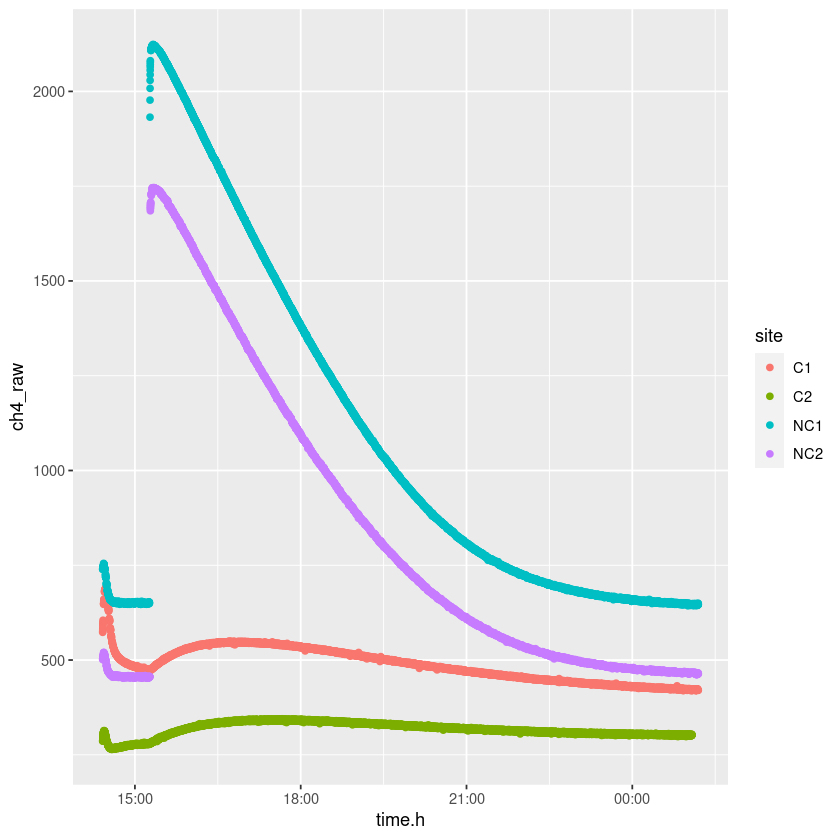

In [101]:
ggplot(data=cNc_r_raw,aes(x=time.h,y=ch4_raw,color=site))+geom_point()

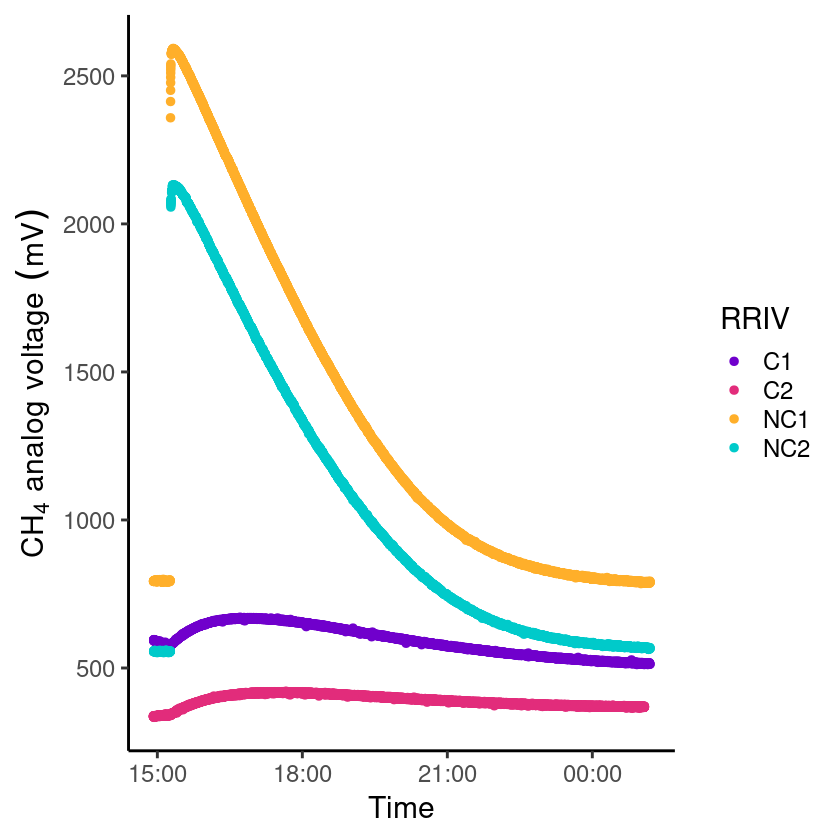

Warning message:
“Removed 14735 rows containing missing values (geom_point).”


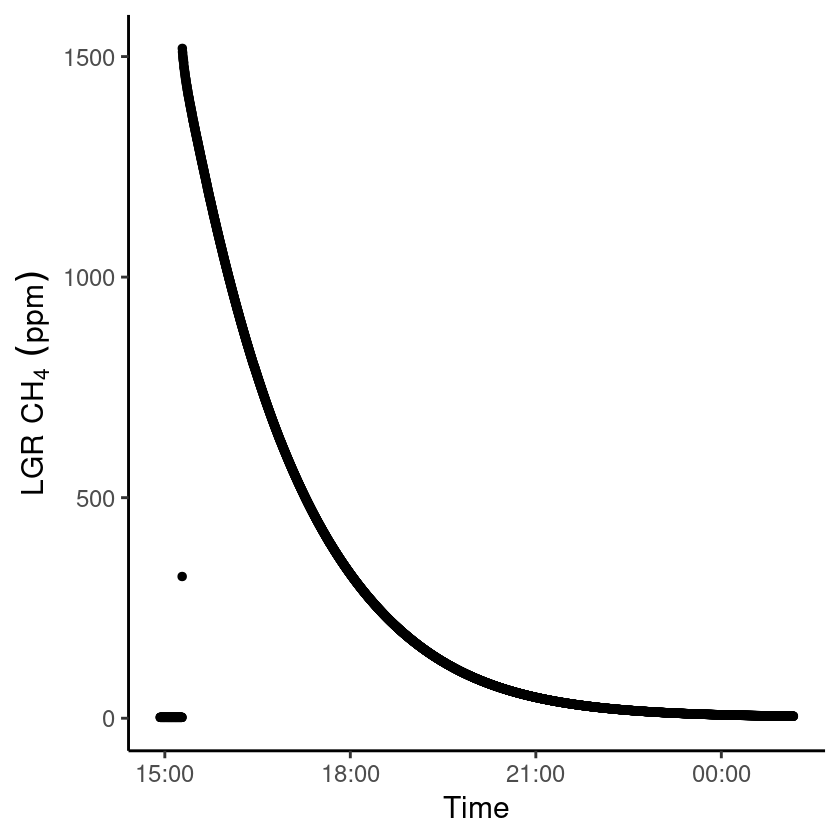

Warning message:
“Removed 14735 rows containing missing values (geom_point).”


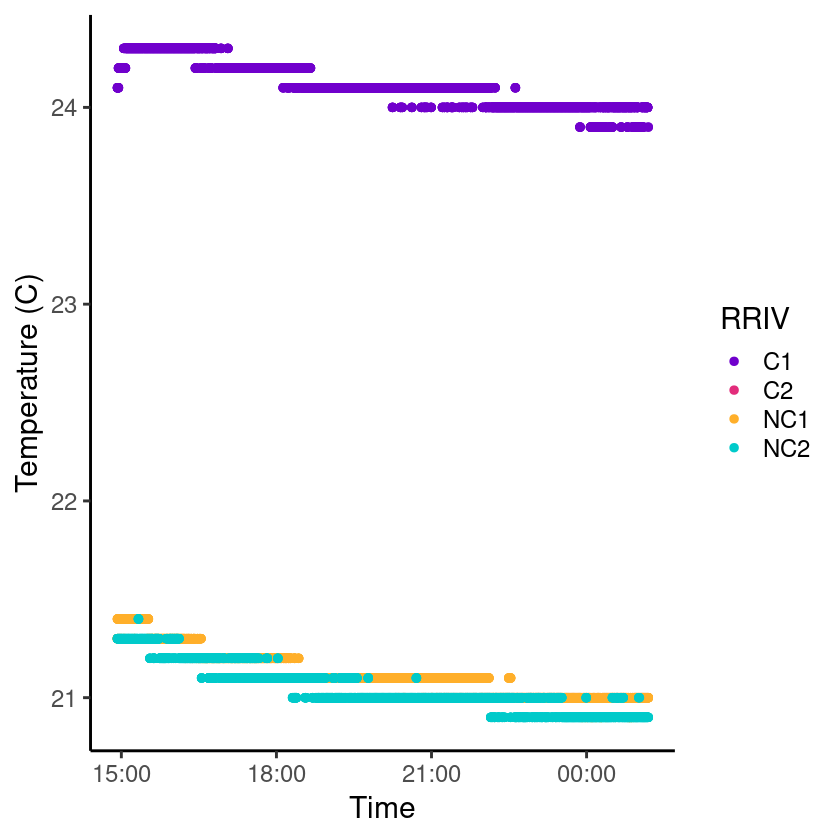

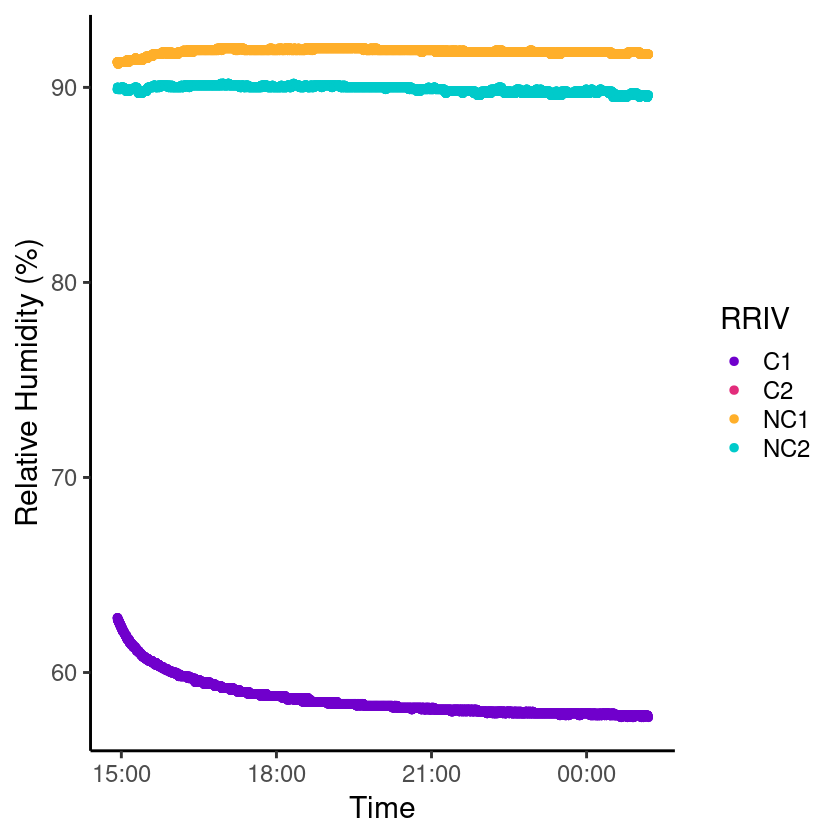

In [102]:
# remove first 30min as warmup period, but leave in methane spike
cnc_r_raw_w<-cNc_r_raw[cNc_r_raw$time.h>range(cNc_r_raw$time.h)[1]+30*60,]
cnc_lgr_w<-cNc_lgr[cNc_lgr$Time>range(cnc_rriv$time.h)[1]+30*60,]

cnc_r_raw_w$ch4_mV<-cnc_r_raw_w$ch4_raw*5000/4096

a<-ggplot(data=cnc_r_raw_w,aes(x=time.h,y=ch4_mV,color=site))+geom_point(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time",y=CH[4]~analog~voltage~(mV), color="RRIV")+
    scale_color_manual(values=custom_colors)

b<-ggplot(data=cnc_lgr_w, aes(x=Time,y=X.CH4._ppm))+geom_point(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time",y=LGR~CH[4]~(ppm))

c<-ggplot(data=cnc_r_raw_w,aes(x=time.h,y=dht_C,color=site))+geom_point(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time",y="Temperature (C)", color="RRIV")+
    scale_color_manual(values=custom_colors)

d<-ggplot(data=cnc_r_raw_w,aes(x=time.h,y=dht_RH,color=site))+geom_point(size=2)+
    theme_classic(base_size=18)+
    labs(x="Time",y="Relative Humidity (%)", color="RRIV")+
    scale_color_manual(values=custom_colors)

a
b
c
d

Warning message:
“Removed 14735 rows containing missing values (geom_point).”
Warning message:
“Removed 14735 rows containing missing values (geom_point).”


png 
  2

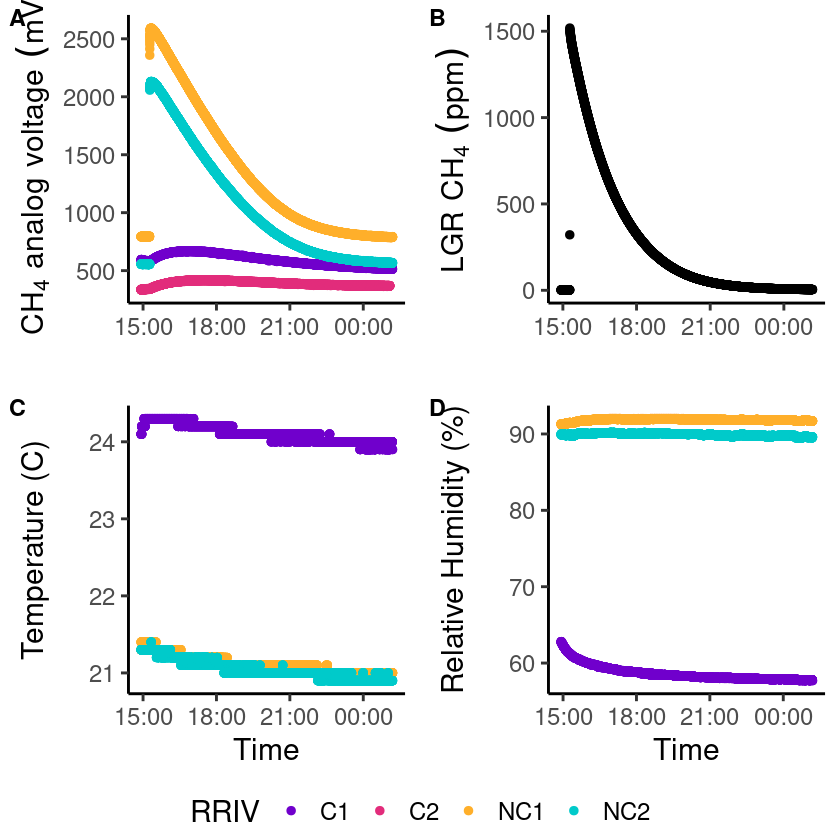

In [103]:
cnc_plot<-ggarrange(a+rremove("x.title"), b+rremove("x.title"), c, d,
          labels = c("A","B","C","D"), common.legend = TRUE, legend="bottom",
                   align=c("hv"))
cnc_plot

savePlot(plot=cnc_plot, tag="cnc1")

png 
  2

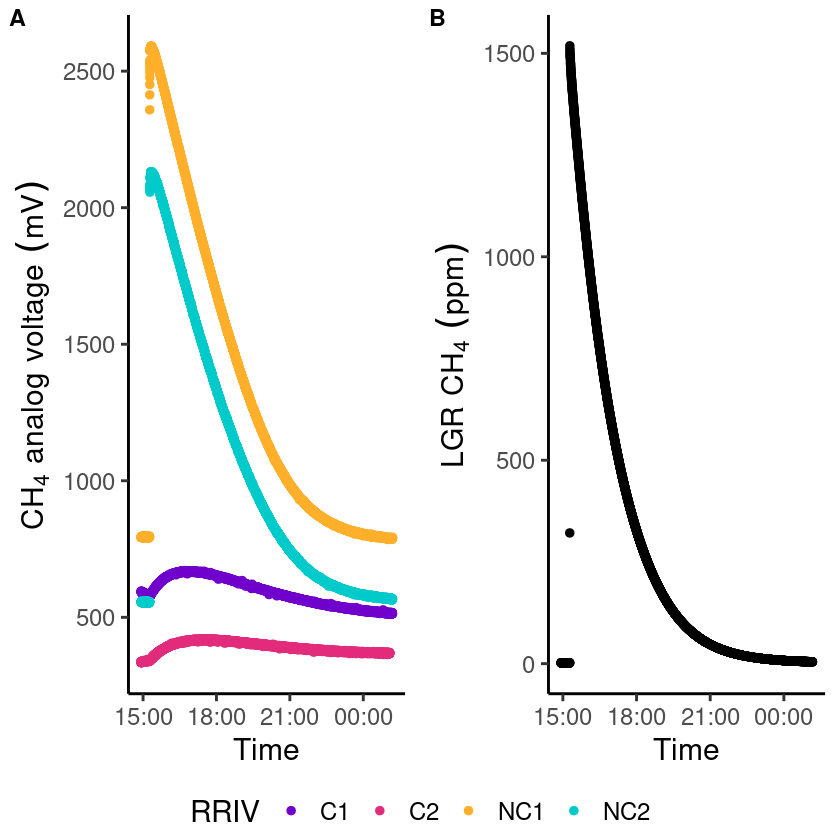

In [104]:
cnc_plot2<-ggarrange(a,b,
          labels = c("A","B"), common.legend = TRUE, legend="bottom")
cnc_plot2

savePlot(plot=cnc_plot2, tag="cnc2", width=800, height=600)

In [105]:
# ggplot(data=cnc_rriv,aes(x=time.h,y=ch4_raw,color=site))+geom_point()

# ggplot(data=cNc_lgr,aes(x=Time,y=X.CH4._ppm))+geom_point()

# ggplot(data=cnc_rriv,aes(x=time.h,y=dht_C,color=site))+geom_point()

# ggplot(data=cnc_rriv,aes(x=time.h,y=dht_RH,color=site))+geom_point()

In [106]:
names(cNc_lgr)

[1] "Time"               "X.CH4._ppm"         "X.CH4._ppm_sd"     
 [4] "X.CO2._ppm"         "X.CO2._ppm_sd"      "X.H2O._ppm"        
 [7] "X.H2O._ppm_sd"      "X.CH4.d_ppm"        "X.CH4.d_ppm_sd"    
[10] "X.CO2.d_ppm"        "X.CO2.d_ppm_sd"     "GasP_torr"         
[13] "GasP_torr_sd"       "GasT_C"             "GasT_C_sd"         
[16] "AmbT_C"             "AmbT_C_sd"          "RD0_us"            
[19] "RD0_us_sd"          "RD1_us"             "RD1_us_sd"         
[22] "RD0_raw_us"         "LTC0_v"             "LTC0_v_sd"         
[25] "LTC1_v"             "LTC1_v_sd"          "HZ"                
[28] "HZ_sd"              "Batt_v"             "Batt_v_sd"         
[31] "BattPer"            "BattPer_sd"         "Temp_Status_mA"    
[34] "Analyzer_Status_mA" "Fit_Flag"           "MIU_VALVE"         
[37] "MIU_DESC"

## Response time calculations based on time of peak

In [107]:
# remove first 30min as warmup
range(cnc_rriv$time.h)

cnc_rriv_w<-cnc_rriv[cnc_rriv$time.h>range(cnc_rriv$time.h)[1]+30*60,]

cnc_lgr_w<-cNc_lgr[cNc_lgr$Time>range(cnc_rriv$time.h)[1]+30*60,]

range(cnc_rriv_w$time.h)

[1] "2023-07-11 14:25:23 UTC" "2023-07-12 01:10:56 UTC"

[1] "2023-07-11 14:55:38 UTC" "2023-07-12 01:10:56 UTC"

In [108]:
# calculate how long it took for C1 to reach peak in data after LGR recognizes methane spike
cnc_c1<-cnc_rriv_w[cnc_rriv_w$site=="C1",]

c1_max_point<-cnc_c1[cnc_c1$ch4_raw==max(cnc_c1$ch4_raw),]

lgr_max_point<-cnc_lgr_w[cnc_lgr_w$X.CH4._ppm==max(cnc_lgr_w$X.CH4._ppm),]

# time to reach peak
c1PeakDelay<-c1_max_point$time.h-lgr_max_point$Time
c1PeakDelay

Time difference of 1.714621 hours

In [109]:
# calculate how long it took for C2 to reach peak in data after LGR recognizes methane spike
cnc_c2<-cNc_r_raw[cNc_r_raw$site=="C2",]

c2_max_point<-cnc_c2[cnc_c2$ch4_raw==max(cnc_c2$ch4_raw),]

# time for c2 to reach peak
c2PeakDelay<-c2_max_point$time.h[1]-lgr_max_point$Time
c2PeakDelay

Time difference of 2.365289 hours

In [110]:
# calculate how long it took for NC1 to reach peak in data after LGR recognizes methane spike
cnc_nc1<-cNc_r_raw[cNc_r_raw$site=="NC1",]

nc1_max_point<-cnc_nc1[cnc_nc1$ch4_raw==max(cnc_nc1$ch4_raw),]

# time for c2 to reach peak
nc1PeakDelay<-nc1_max_point$time.h[1]-lgr_max_point$Time
nc1PeakDelay

Time difference of 2.742 mins

In [111]:
# calculate how long it took for NC2 to reach peak in data after LGR recognizes methane spike
cnc_nc2<-cNc_r_raw[cNc_r_raw$site=="NC2",]

nc2_max_point<-cnc_nc2[cnc_nc2$ch4_raw==max(cnc_nc2$ch4_raw),]

# time for c2 to reach peak
nc2PeakDelay<-nc2_max_point$time.h[1]-lgr_max_point$Time
nc2PeakDelay

Time difference of 2.058817 mins

## interpolate data for C1 and NC1

In [112]:
# data sets:
# cnc_rriv_w
# cnc_lgr_w

unique(cnc_rriv_w$site)

[1] C1  NC1
Levels: C1 C2 NC1 NC2

In [113]:
# list of sites
siteList<-unique(cnc_rriv_w$site)

# hold data
interpolated_data<-vector("list",length(siteList))
names(interpolated_data)<-siteList

for(s in siteList){
    subset<-cnc_rriv_w[cnc_rriv_w$site==s,]
    temp<-interpolateData(df1=subset,df2=cnc_lgr_w)
    temp$site=s
    interpolated_data[[s]]<-temp
}

interpolated_df<-do.call(rbind, interpolated_data)
str(interpolated_df)

[1] "df1 time range is larger"
[1] "df1 time range is larger"
'data.frame':	1230 obs. of  6 variables:
 $ time_utc    : POSIXct, format: "2023-07-11 14:55:50" "2023-07-11 14:56:50" ...
 $ ch4_raw_rriv: num  486 486 484 484 483 ...
 $ dht_C       : num  24.1 24.1 24.2 24.2 24.2 ...
 $ dht_RH      : num  62.8 62.7 62.6 62.5 62.4 ...
 $ ch4_ppm_lgr : num  2 2 2 2 2 ...
 $ site        : chr  "C1" "C1" "C1" "C1" ...


In [114]:
head(interpolated_df)

length(interpolated_df$site)

time_utc            ch4_raw_rriv dht_C    dht_RH   ch4_ppm_lgr site
C1.1 2023-07-11 14:55:50 486.3000     24.10000 62.75000 2.004677    C1  
C1.2 2023-07-11 14:56:50 486.1030     24.14926 62.65149 2.003177    C1  
C1.3 2023-07-11 14:57:50 483.7713     24.19851 62.55297 2.003202    C1  
C1.4 2023-07-11 14:58:50 483.5088     24.20000 62.45440 2.003753    C1  
C1.5 2023-07-11 14:59:50 483.0296     24.20000 62.35591 2.003246    C1  
C1.6 2023-07-11 15:00:50 481.5184     24.20000 62.25740 2.003626    C1

[1] 1230

In [115]:
cncGAM<-vector("list",length(siteList))
names(cncGAM)<-siteList

cncGAM_summary<-vector("list",length(siteList))
names(cncGAM_summary)<-siteList


for(s in siteList){
    print(s)
    subset<-interpolated_df[interpolated_df$site==s,]
    cncGAM[[s]]<-mgcv::gam(ch4_ppm_lgr~s(ch4_raw_rriv)+s(dht_C)+s(dht_RH),data=subset)
    
    sum<-summary(cncGAM[[s]])
    cncGAM_summary[[s]]<-sum
    
    outFile<-paste0(outputDirectory,"site_", s,"_gam.txt")
    writeFile(capture.output(sum), outFile)
    
    print(sum)
}

[1] "C1"

Family: gaussian 
Link function: identity 

Formula:
ch4_ppm_lgr ~ s(ch4_raw_rriv) + s(dht_C) + s(dht_RH)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  256.321      2.612   98.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                  edf Ref.df       F p-value    
s(ch4_raw_rriv) 8.755  8.971  10.991 < 2e-16 ***
s(dht_C)        5.288  6.569   2.993 0.00531 ** 
s(dht_RH)       8.915  8.993 316.099 < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.968   Deviance explained = 96.9%
GCV = 4364.5  Scale est. = 4194.4    n = 615
[1] "NC1"

Family: gaussian 
Link function: identity 

Formula:
ch4_ppm_lgr ~ s(ch4_raw_rriv) + s(dht_C) + s(dht_RH)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  256.145      1.211   211.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘

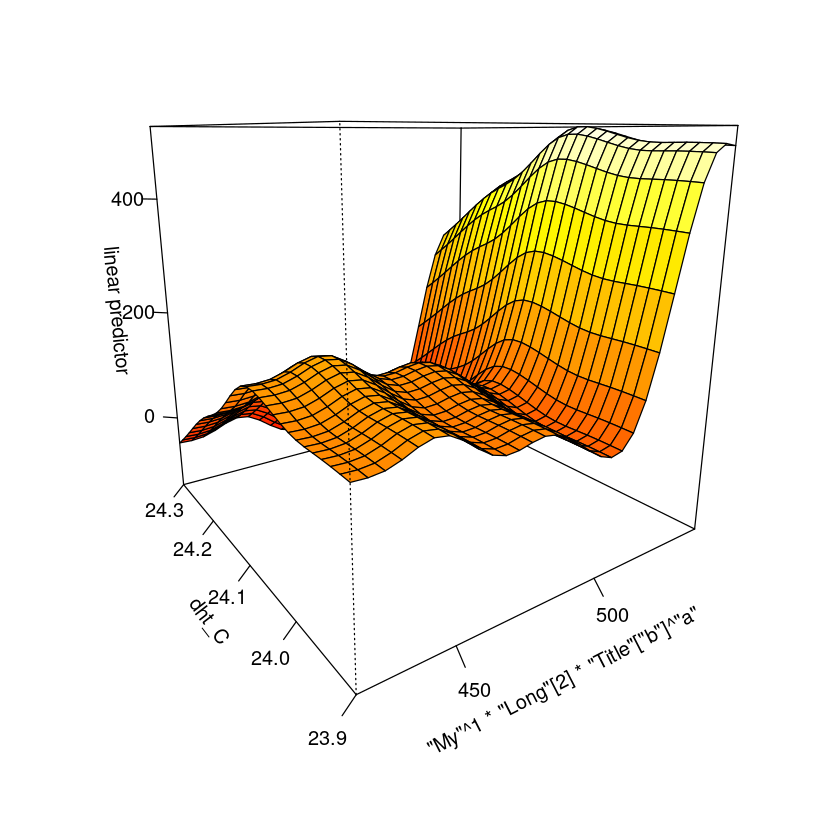

In [130]:
xlabel=expression('ch'[4])
vis.gam(cncGAM[[1]],ticktype="detailed",color="heat",theta=-35, xlab=expression("My"^1*"Long"[2]*"Title"["b"]^"a"))

# vis.gam(cncGAM[[2]],ticktype="detailed",color="heat",theta=-35)

# vis.gam(gam_rriv,ticktype="detailed",color="heat",theta=-35)

In [ ]:
C1_vis

## repeat interpolation shifting timestamps of C1 by time to peak

In [ ]:
cnc_C1<-cnc_rriv_w[cnc_rriv_w$site=="C1",]
head(cnc_C1)

cnc_C1$time.h<-cnc_C1$time.h-c1PeakDelay
head(cnc_C1)

In [ ]:
c1_interpolated<-interpolateData(df1=cnc_C1,df2=cnc_lgr_w)

In [ ]:
c1ShiftGAM<-mgcv::gam(ch4_ppm_lgr~s(ch4_raw_rriv)+s(dht_C)+s(dht_RH),data=c1_interpolated)
summary(c1ShiftGAM)

actually a worse result, maybe because though shifting the timestamps might align the methane readings more, it throws off the temperature and relative humidity